# 1. Data Acquisition and Understanding
#### Let's start by importing the necessary libraries and loading the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the visual style for our plots
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
# Load the Titanic dataset
# If you're using seaborn's built-in dataset
titanic = sns.load_dataset('titanic')

In [4]:
# Alternative: If you're loading from a CSV file
# titanic = pd.read_csv("C:/Users/HP/OneDrive/Desktop/mini project data science/Titanic-Dataset.csv")

In [5]:
# Let's print the exact column names to see what we're working with
print("Column names in the dataset:")
print(titanic.columns.tolist())

Column names in the dataset:
['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [6]:
# Examine the first few rows
print("First 5 rows of the dataset:")
print(titanic.head())

First 5 rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [7]:
# Check the dimensions of the dataset
print("\nDataset dimensions (rows, columns):", titanic.shape)


Dataset dimensions (rows, columns): (891, 15)


In [8]:
# Get basic information about the dataset
print("\nDataset information:")
titanic.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
# Generate summary statistics
print("\nSummary statistics:")
print(titanic.describe())


Summary statistics:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [10]:
# Check for missing values
print("\nMissing values per column:")
print(titanic.isna().sum())


Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# What This Reveals:

1. Data Structure: We learn the dataset has 891 passengers and 15 features including passenger ID, survival status, class, name, sex, age, etc.
2. Data Types: We identify which columns are numeric versus categorical.
3. Missing Values: We can see age has 177 missing values, cabin has 687, and embarked has 2 - this already tells us cabin information might be less reliable.
4. Value Ranges: From the descriptive statistics, we learn the age range (0.42 to 80 years), fare range (0 to 512), and other numeric variable distributions.

# 2. Data Cleaning and Preparation
#### Next, let's clean our data and address the missing values:

In [11]:
# Create a copy of the dataset for cleaning
titanic_clean = titanic.copy()

In [12]:
# Now, let's handle missing values using the correct column names
# For age, we'll impute with median grouped by passenger class and sex
titanic_clean['age'] = titanic_clean.groupby(['pclass', 'sex'])['age'].transform(
    lambda x: x.fillna(x.median()))

In [13]:
# Handle missing values
# For age, we'll impute with median grouped by passenger class and sex
# This approach assumes people of similar class and sex might have similar ages
titanic_clean['age'] = titanic_clean.groupby(['pclass', 'sex'])['age'].transform(
    lambda x: x.fillna(x.median()))

In [14]:
# For embarked, we'll fill with the most common value since it's only missing for a few rows
most_common_embarked = titanic_clean['embarked'].mode()[0]
titanic_clean['embarked'] = titanic_clean['embarked'].fillna(most_common_embarked)

In [15]:
# For deck (cabin information), create a 'has_deck' feature
titanic_clean['has_deck'] = titanic_clean['deck'].notna().astype(int)

# Create a family size feature by combining siblings/spouses and parents/children
titanic_clean['family_size'] = titanic_clean['sibsp'] + titanic_clean['parch'] + 1  # +1 for the passenger themselves

# Note: 'alone' already exists in this dataset, but we'll create our version for consistency
titanic_clean['is_alone'] = (titanic_clean['family_size'] == 1).astype(int)

# Create passenger category based on 'who' column (which contains: man, woman, child)
# This effectively replaces the 'title' feature you were trying to create
titanic_clean['passenger_category'] = titanic_clean['who']

In [16]:
# Verify cleaning results
print("\nMissing values after cleaning:")
print(titanic_clean.isna().sum())


Missing values after cleaning:
survived                0
pclass                  0
sex                     0
age                     0
sibsp                   0
parch                   0
fare                    0
embarked                0
class                   0
who                     0
adult_male              0
deck                  688
embark_town             2
alive                   0
alone                   0
has_deck                0
family_size             0
is_alone                0
passenger_category      0
dtype: int64


In [17]:
# Display the first few rows of the cleaned dataset
print("\nFirst 5 rows of the cleaned dataset:")
print(titanic_clean.head())


First 5 rows of the cleaned dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  has_deck  family_size  \
0    man        True  NaN  Southampton    no  False         0            2   
1  woman       False    C    Cherbourg   yes  False         1            2   
2  woman       False  NaN  Southampton   yes   True         0            1   
3  woman       False    C  Southampton   yes  False         1            2   
4    man        True  NaN  Southampton    no   True         0            1   

   is_alone passenger_category  
0  

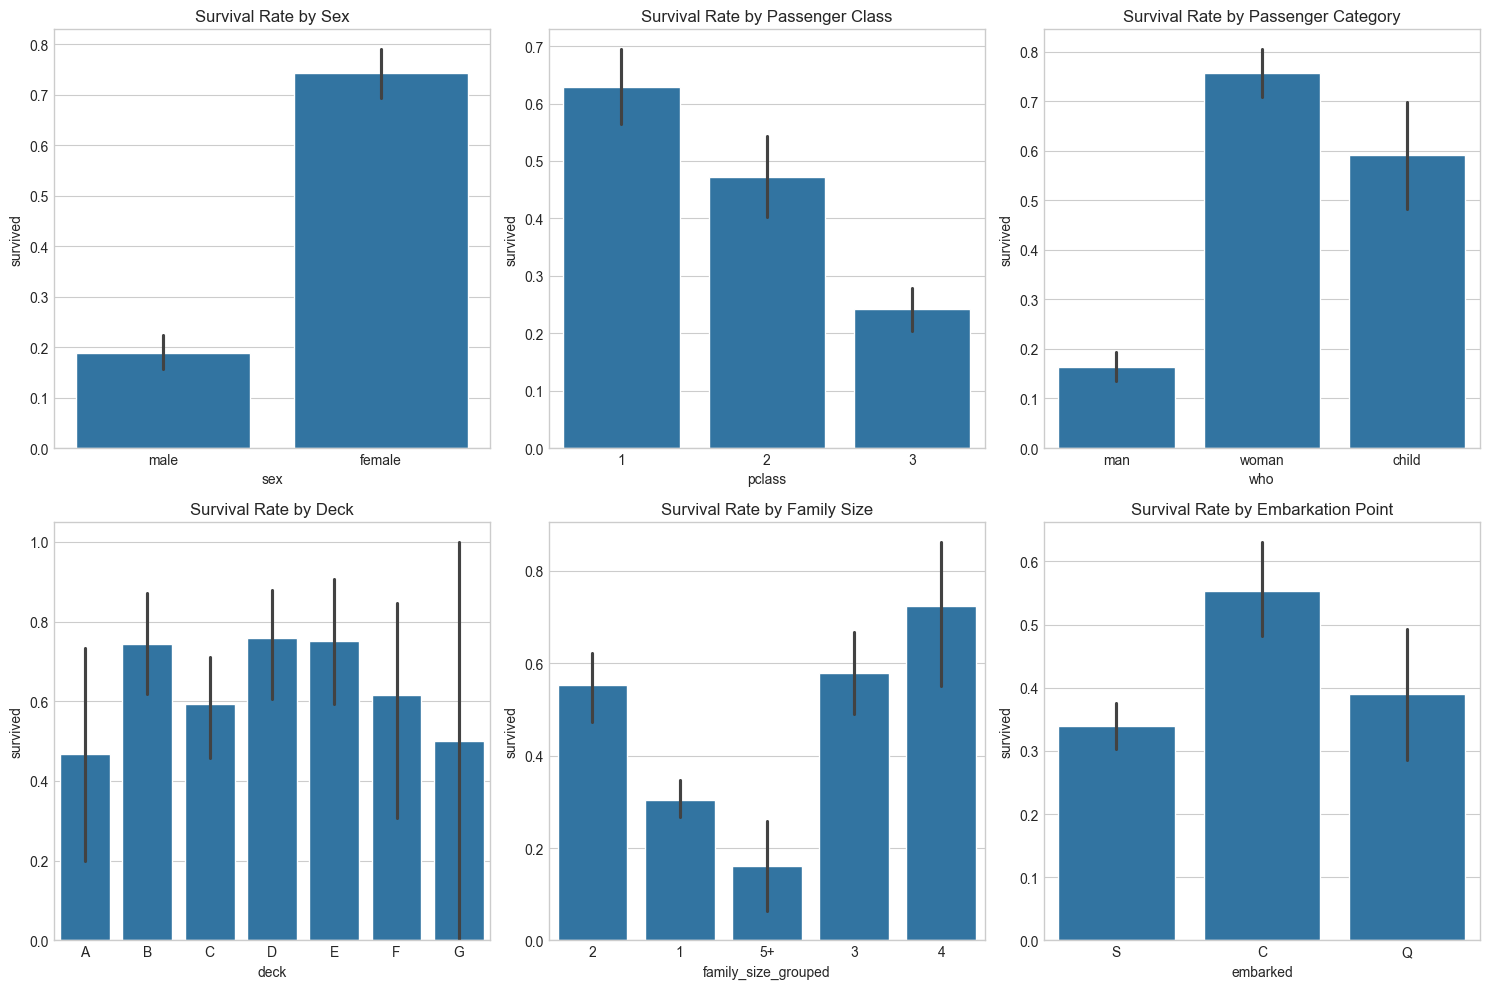

In [18]:
# Let's create some visualizations to understand survival rates
plt.figure(figsize=(15, 10))

# Survival rate by sex
plt.subplot(2, 3, 1)
sns.barplot(x='sex', y='survived', data=titanic_clean)
plt.title('Survival Rate by Sex')

# Survival rate by passenger class
plt.subplot(2, 3, 2)
sns.barplot(x='pclass', y='survived', data=titanic_clean)
plt.title('Survival Rate by Passenger Class')

# Survival rate by who (man/woman/child)
plt.subplot(2, 3, 3)
sns.barplot(x='who', y='survived', data=titanic_clean)
plt.title('Survival Rate by Passenger Category')

# Survival rate by deck
plt.subplot(2, 3, 4)
sns.barplot(x='deck', y='survived', data=titanic_clean)
plt.title('Survival Rate by Deck')

# Survival rate by family size
plt.subplot(2, 3, 5)
# Group family sizes greater than 4
titanic_clean['family_size_grouped'] = titanic_clean['family_size'].map(lambda x: '5+' if x >= 5 else str(x))
sns.barplot(x='family_size_grouped', y='survived', data=titanic_clean)
plt.title('Survival Rate by Family Size')

# Survival rate by embarkation point
plt.subplot(2, 3, 6)
sns.barplot(x='embarked', y='survived', data=titanic_clean)
plt.title('Survival Rate by Embarkation Point')

plt.tight_layout()
plt.show()

# What This Reveals:

1. Missing Value Patterns: The very high percentage of missing cabin information (77%) suggests this data wasn't randomly missing but might reflect a systematic issue in record keeping.
2. Feature Engineering Opportunities: By creating derived features like family_size, is_alone, and extracting titles, we're capturing potential survival factors that might not be apparent in the original features.
3. Data Quality: After cleaning, we've addressed all missing values in a way that preserves the dataset's integrity.

# 3. Univariate Analysis
#### Now, let's analyze individual variables to understand their distributions:

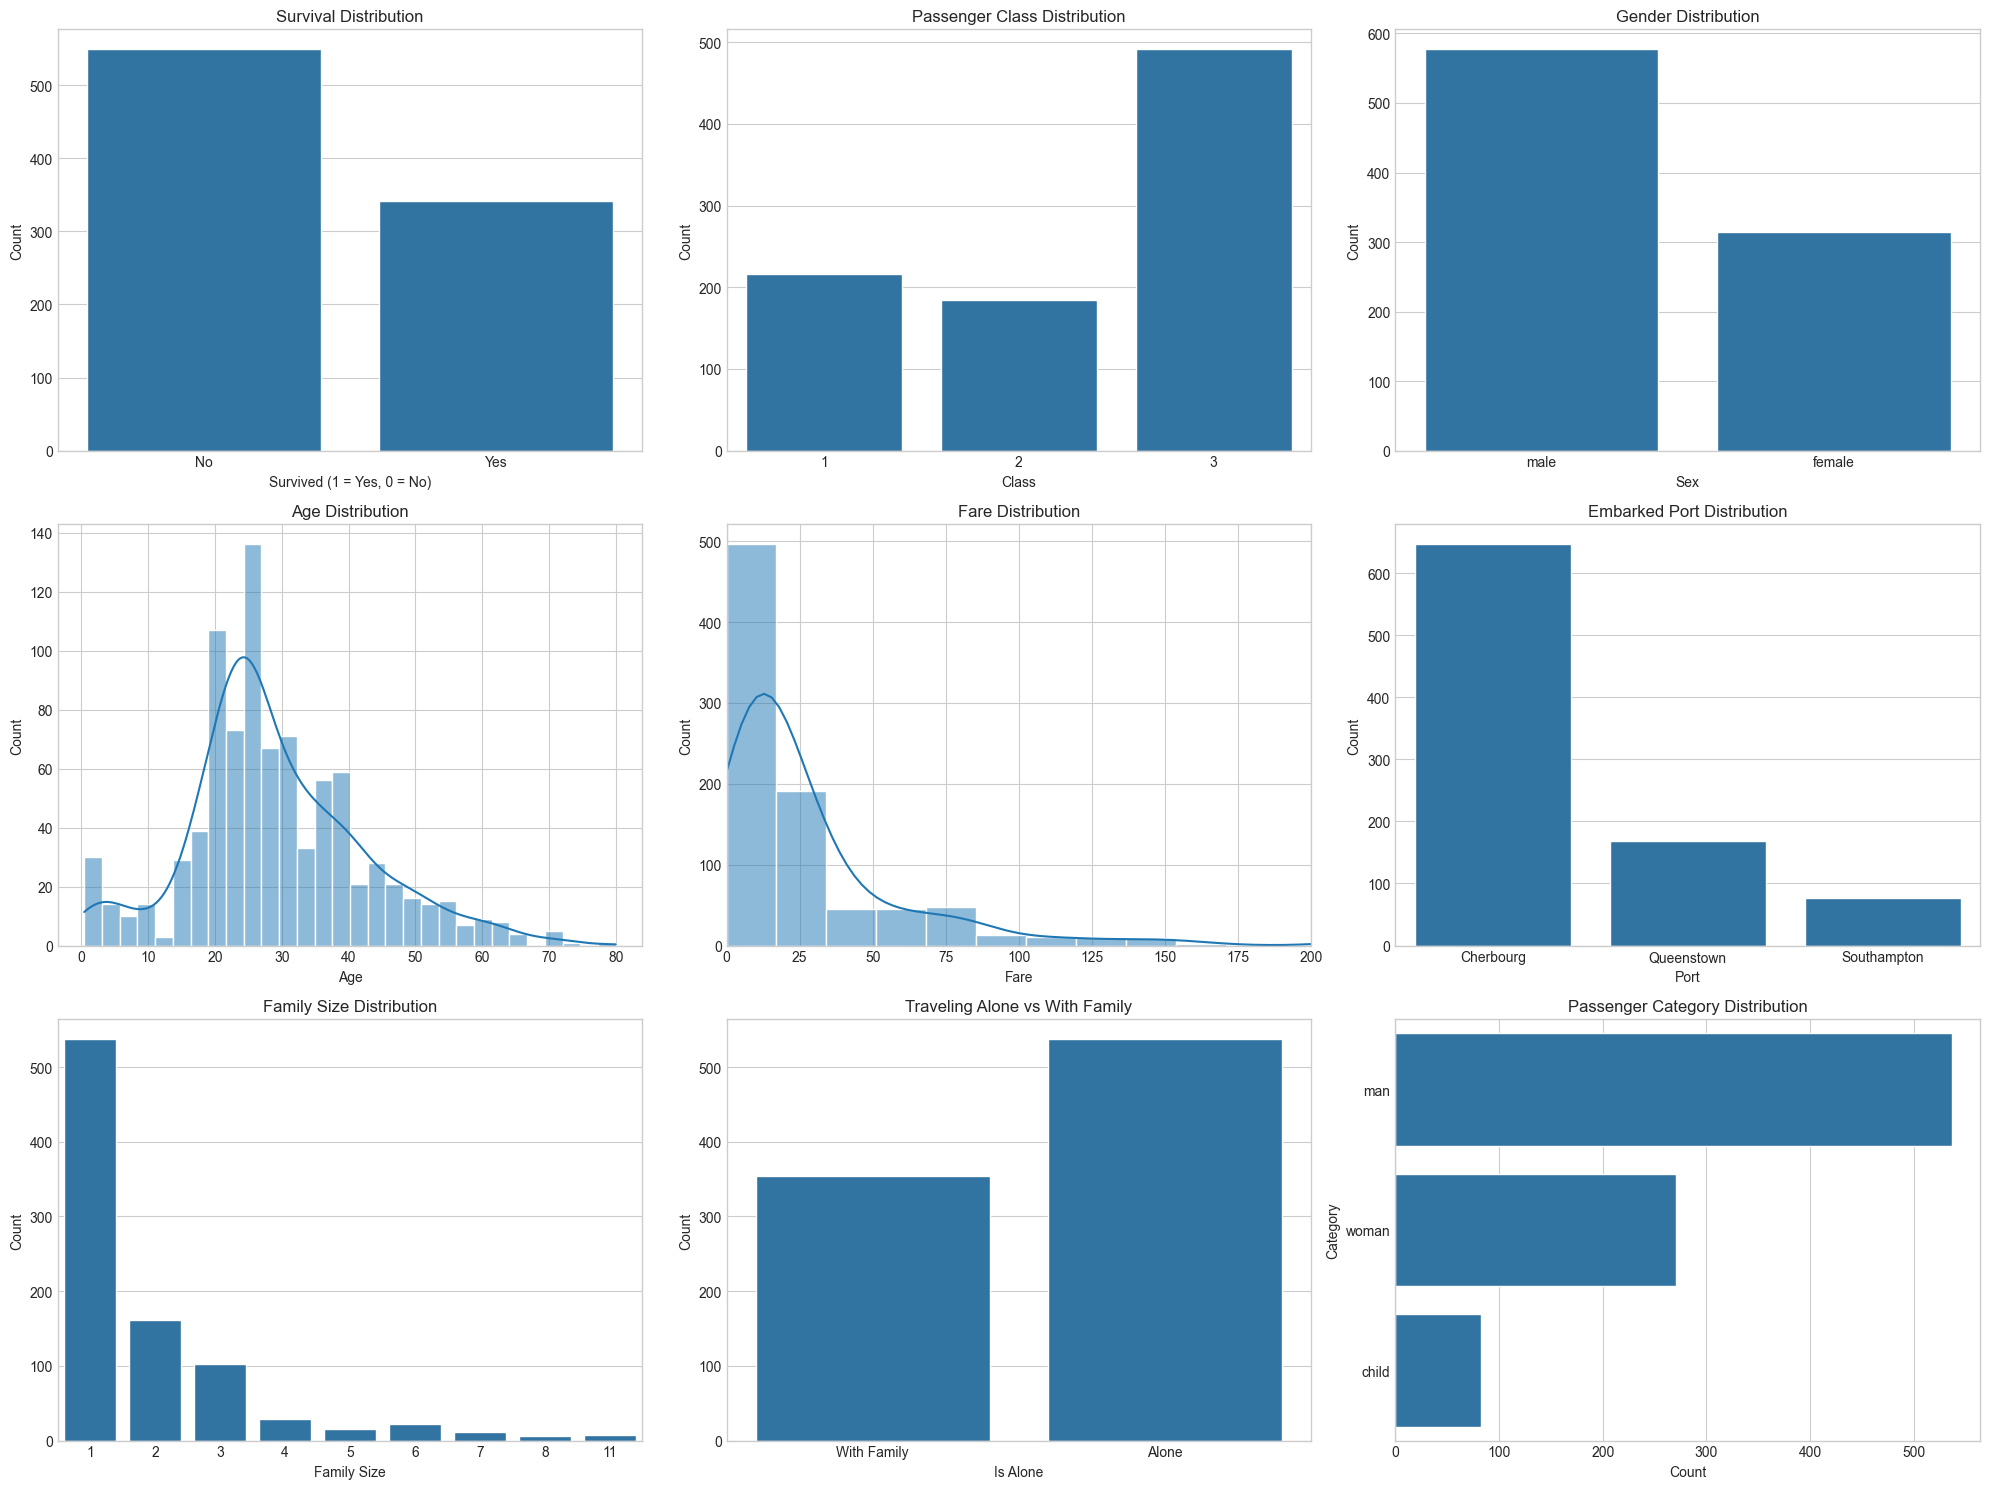

Age Statistics:
count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64

Fare Statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Gender Counts:
sex
male      577
female    314
Name: count, dtype: int64

Class Counts:
pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked Port Counts:
embarked
S    646
C    168
Q     77
Name: count, dtype: int64

Passenger Category Counts:
passenger_category
man      537
woman    271
child     83
Name: count, dtype: int64


In [19]:
# Set up a figure for multiple plots
plt.figure(figsize=(20, 15))

# 1. Survival Distribution
plt.subplot(3, 3, 1)
survival_counts = titanic_clean['survived'].value_counts()
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title('Survival Distribution')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])

# 2. Passenger Class Distribution
plt.subplot(3, 3, 2)
sns.countplot(x='pclass', data=titanic_clean)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# 3. Gender Distribution
plt.subplot(3, 3, 3)
sns.countplot(x='sex', data=titanic_clean)
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

# 4. Age Distribution
plt.subplot(3, 3, 4)
sns.histplot(titanic_clean['age'], kde=True, bins=30)  # lowercase 'age'
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 5. Fare Distribution
plt.subplot(3, 3, 5)
sns.histplot(titanic_clean['fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.xlim(0, 200)  # Limiting to see distribution better (excluding extreme values)

# 6. Embarked Port Distribution
plt.subplot(3, 3, 6)
sns.countplot(x='embarked', data=titanic_clean)
plt.title('Embarked Port Distribution')
plt.xlabel('Port')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])  # Adjusted for potential numbering

# 7. Family Size Distribution
plt.subplot(3, 3, 7)
sns.countplot(x='family_size', data=titanic_clean)
plt.title('Family Size Distribution')
plt.xlabel('Family Size')
plt.ylabel('Count')

# 8. Alone vs With Family Distribution
plt.subplot(3, 3, 8)
sns.countplot(x='is_alone', data=titanic_clean)
plt.title('Traveling Alone vs With Family')
plt.xlabel('Is Alone')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.ylabel('Count')

# 9. Passenger Category Distribution (using 'who' instead of 'title')
plt.subplot(3, 3, 9)
sns.countplot(y='passenger_category', data=titanic_clean, 
              order=titanic_clean['passenger_category'].value_counts().index)
plt.title('Passenger Category Distribution')
plt.xlabel('Count')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

# Summary statistics for numerical variables
print("Age Statistics:")
print(titanic_clean['age'].describe())  # lowercase 'age'

print("\nFare Statistics:")
print(titanic_clean['fare'].describe())

# Frequency tables for categorical variables
print("\nGender Counts:")
print(titanic_clean['sex'].value_counts())

print("\nClass Counts:")
print(titanic_clean['pclass'].value_counts())

print("\nEmbarked Port Counts:")
print(titanic_clean['embarked'].value_counts())

print("\nPassenger Category Counts:")
print(titanic_clean['passenger_category'].value_counts())  # Using 'passenger_category' instead of 'title'

# What This Reveals:

1. Survival Rate: Only about 38% of passengers survived, showing the high fatality rate.
2. Passenger Demographics: Most passengers were in third class, and males outnumbered females.
3. Age Distribution: The average age was around 30, with a right-skewed distribution showing more younger passengers.
4. Fare Distribution: Highly right-skewed, indicating most passengers paid lower fares with a few paying substantially higher amounts.
5. Embarkation: Most passengers boarded at Southampton (S), followed by Cherbourg (C) and Queenstown (Q).
6. Family Structure: Most passengers traveled alone or with very small family groups.
7. Social Status: The distribution of titles gives us insight into the social composition of the passengers.

# 4. Bivariate Analysis
#### Let's analyze relationships between survival and other variables:

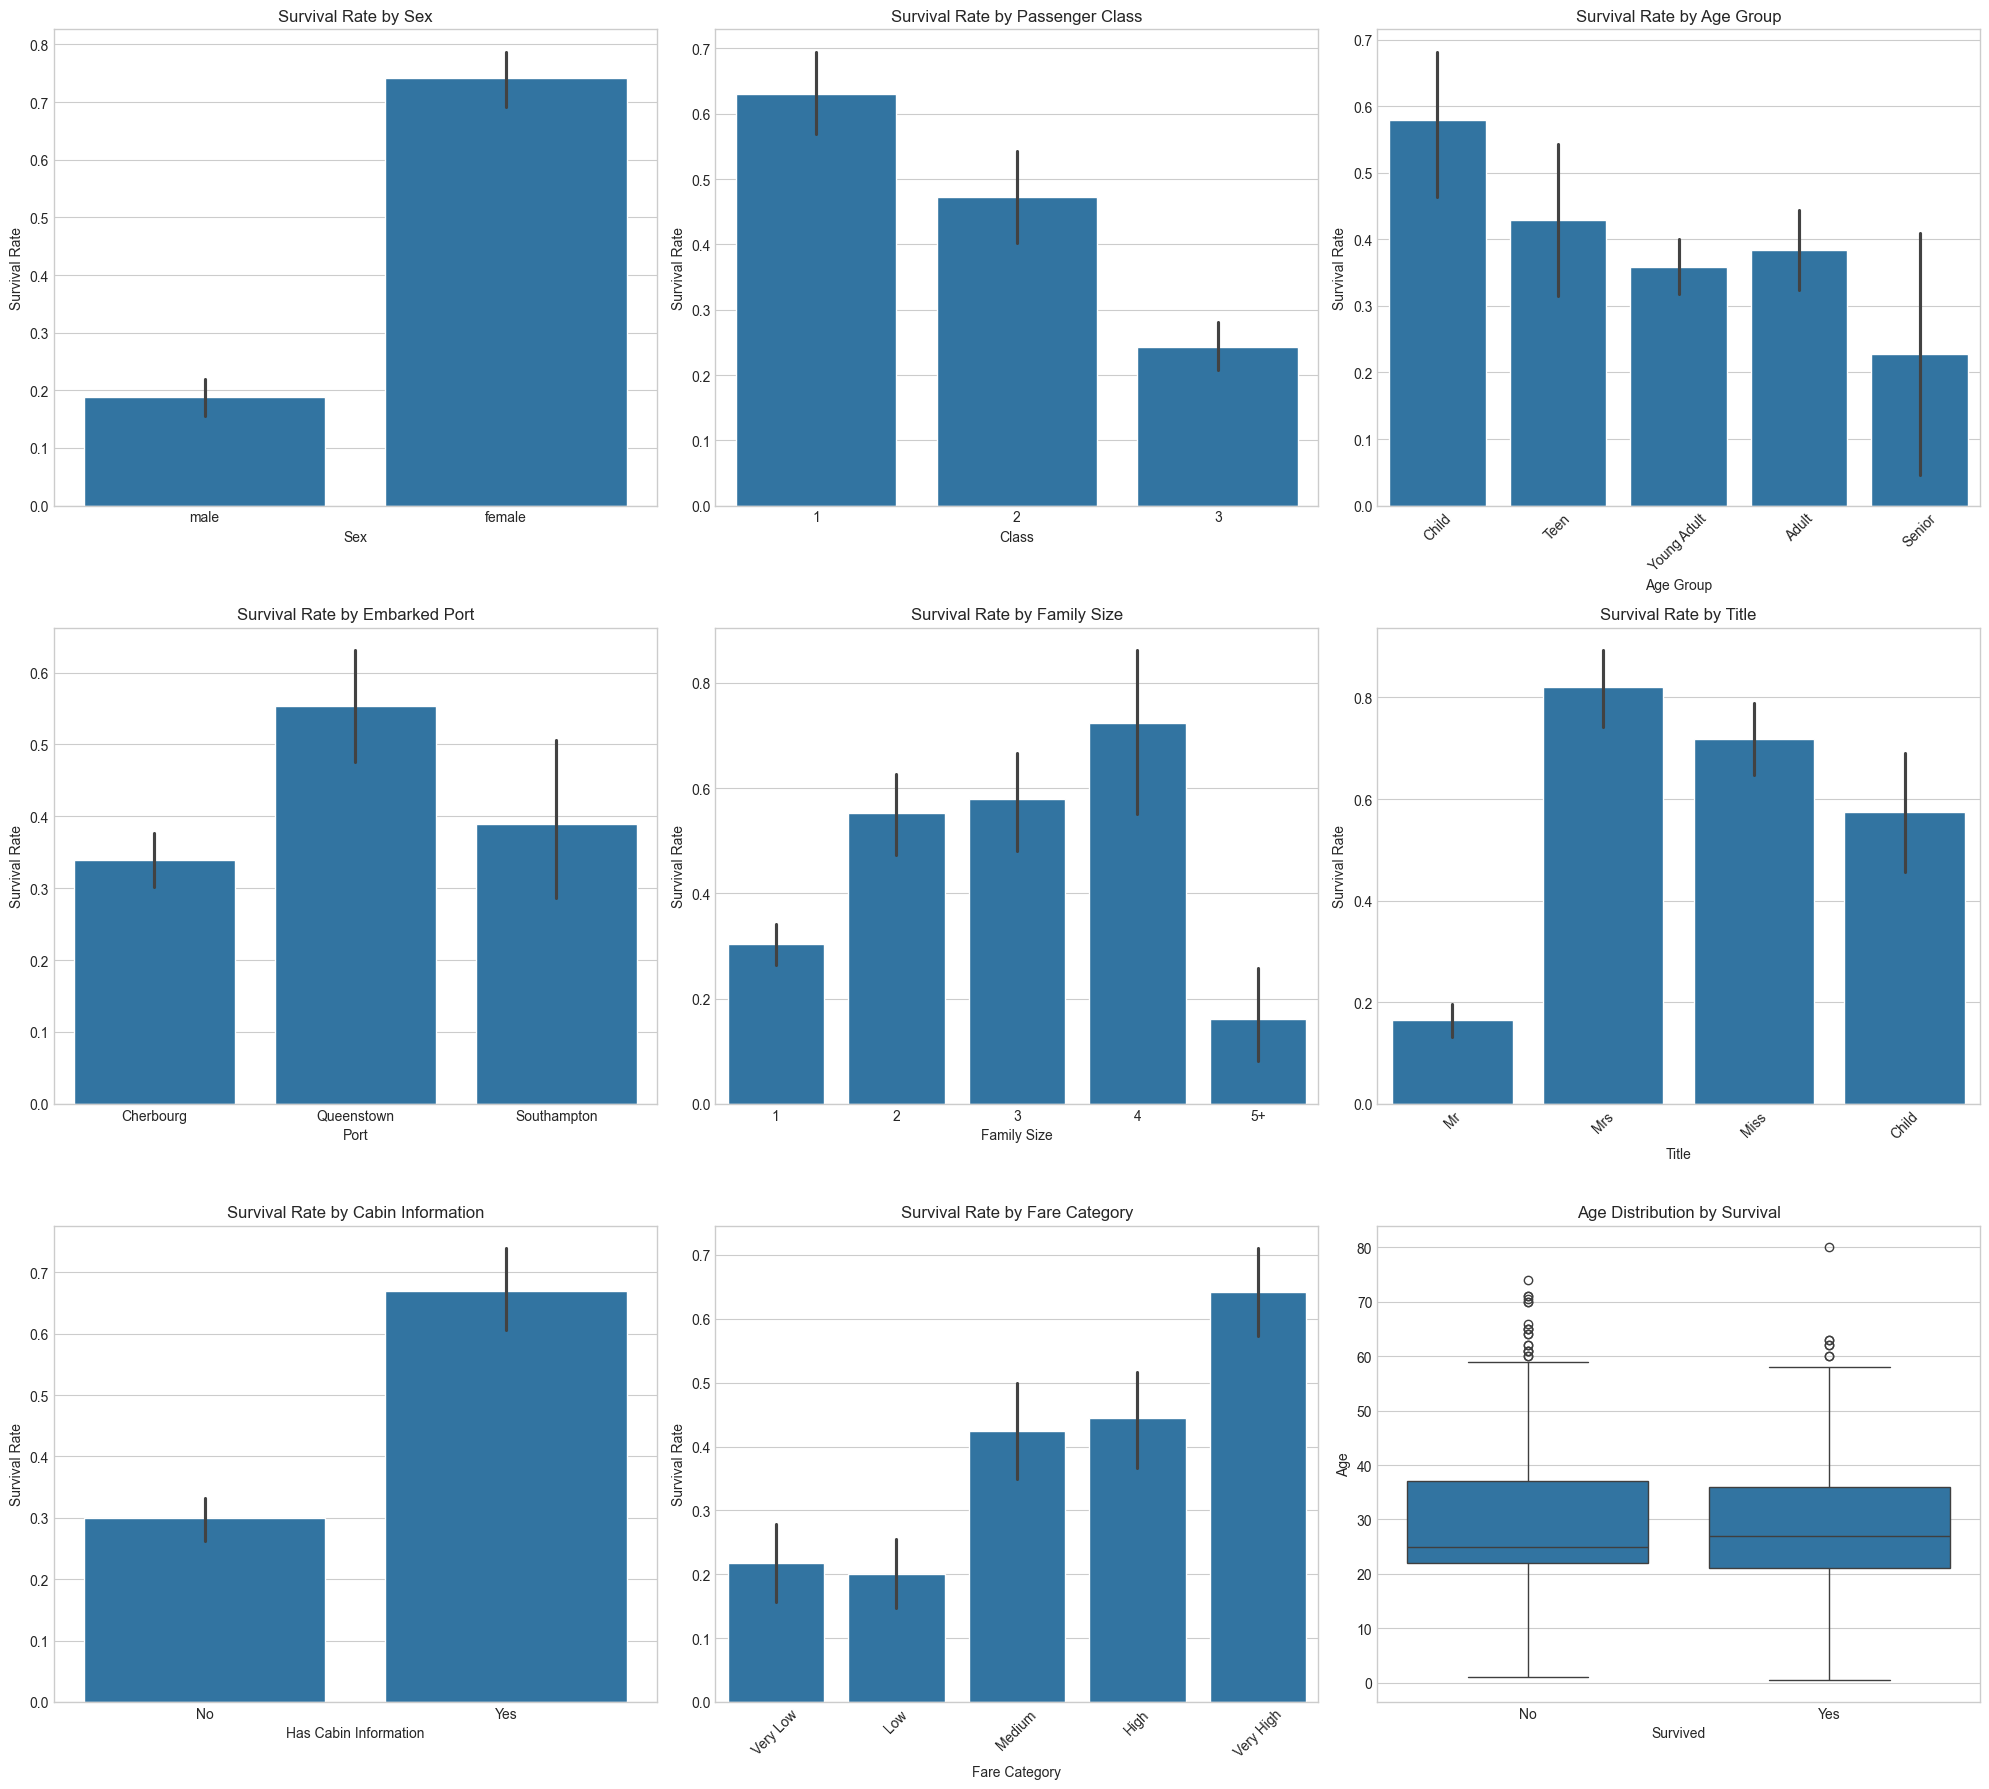

Chi-square test for Sex and Survival:
Chi2 value: 260.71702016732104, p-value: 1.1973570627755645e-58

Chi-square test for Class and Survival:
Chi2 value: 102.88898875696056, p-value: 4.549251711298793e-23

Correlation Matrix:
             survived    pclass       age     sibsp     parch      fare  \
survived     1.000000 -0.338481 -0.059579 -0.035322  0.081629  0.257307   
pclass      -0.338481  1.000000 -0.413583  0.083081  0.018443 -0.549500   
age         -0.059579 -0.413583  1.000000 -0.249854 -0.175526  0.122692   
sibsp       -0.035322  0.083081 -0.249854  1.000000  0.414838  0.159651   
parch        0.081629  0.018443 -0.175526  0.414838  1.000000  0.216225   
fare         0.257307 -0.549500  0.122692  0.159651  0.216225  1.000000   
family_size  0.016639  0.065997 -0.258456  0.890712  0.783111  0.217138   

             family_size  
survived        0.016639  
pclass          0.065997  
age            -0.258456  
sibsp           0.890712  
parch           0.783111  
fare      

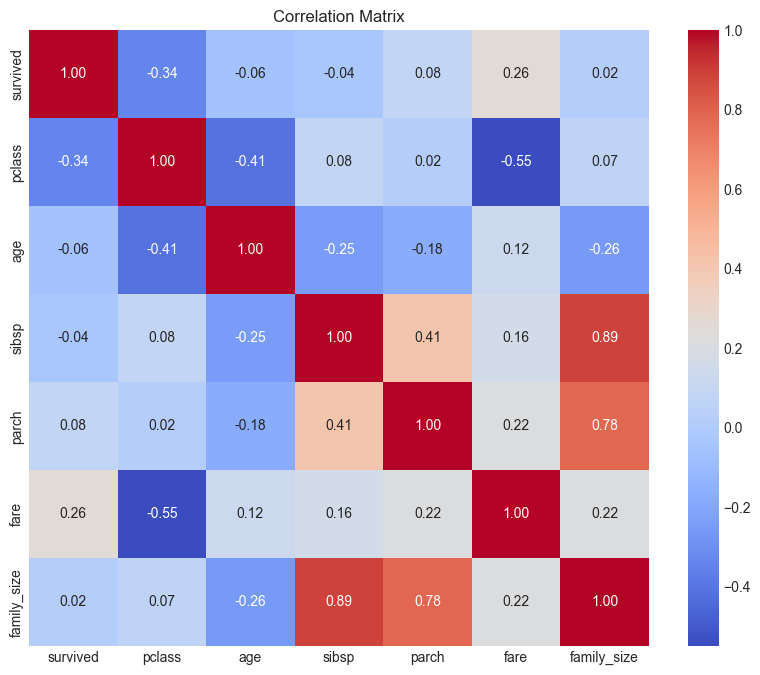

In [20]:
# Set up a figure for multiple plots
plt.figure(figsize=(20, 18))

# First, create the necessary features that don't exist yet
# Create a family size feature
titanic_clean['family_size'] = titanic_clean['sibsp'] + titanic_clean['parch'] + 1  # +1 for the passenger themselves

# Create a has_cabin feature based on deck
titanic_clean['has_cabin'] = ~titanic_clean['deck'].isna()

# Create a simplified title feature based on who/sex/age
titanic_clean['title'] = 'Mr'  # default
titanic_clean.loc[titanic_clean['sex'] == 'female', 'title'] = 'Miss'
titanic_clean.loc[(titanic_clean['sex'] == 'female') & (titanic_clean['age'] > 30), 'title'] = 'Mrs'
titanic_clean.loc[titanic_clean['age'] < 12, 'title'] = 'Child'

# Now continue with the visualization
# 1. Survival by Sex
plt.subplot(3, 3, 1)
sns.barplot(x='sex', y='survived', data=titanic_clean)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# 2. Survival by Passenger Class
plt.subplot(3, 3, 2)
sns.barplot(x='pclass', y='survived', data=titanic_clean)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

# 3. Survival by Age
plt.subplot(3, 3, 3)
# Create age bins for better visualization
titanic_clean['age_group'] = pd.cut(titanic_clean['age'], bins=[0, 12, 18, 35, 60, 100], 
                                   labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='age_group', y='survived', data=titanic_clean)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 4. Survival by Embarked Port
plt.subplot(3, 3, 4)
sns.barplot(x='embarked', y='survived', data=titanic_clean)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Port')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])

# 5. Survival by Family Size
plt.subplot(3, 3, 5)
# Group large families together for better visualization
titanic_clean['family_group'] = titanic_clean['family_size'].map(lambda x: '5+' if x >= 5 else str(x))
sns.barplot(x='family_group', y='survived', data=titanic_clean, 
           order=['1', '2', '3', '4', '5+'])
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

# 6. Survival by Title
plt.subplot(3, 3, 6)
sns.barplot(x='title', y='survived', data=titanic_clean)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 7. Survival by Has Cabin Information
plt.subplot(3, 3, 7)
sns.barplot(x='has_cabin', y='survived', data=titanic_clean)
plt.title('Survival Rate by Cabin Information')
plt.xlabel('Has Cabin Information')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Survival Rate')

# 8. Fare and Survival Relationship
plt.subplot(3, 3, 8)
# Create fare bins for better visualization
titanic_clean['fare_category'] = pd.qcut(titanic_clean['fare'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
sns.barplot(x='fare_category', y='survived', data=titanic_clean)
plt.title('Survival Rate by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 9. Age Distribution by Survival
plt.subplot(3, 3, 9)
sns.boxplot(x='survived', y='age', data=titanic_clean)  # Changed 'Age' to 'age'
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

# Statistical analysis of relationships
# Chi-square test for categorical variables
from scipy.stats import chi2_contingency

# Sex and Survival
print("Chi-square test for Sex and Survival:")
sex_survival = pd.crosstab(titanic_clean['sex'], titanic_clean['survived'])
chi2, p, dof, expected = chi2_contingency(sex_survival)
print(f"Chi2 value: {chi2}, p-value: {p}")

# Class and Survival
print("\nChi-square test for Class and Survival:")
class_survival = pd.crosstab(titanic_clean['pclass'], titanic_clean['survived'])
chi2, p, dof, expected = chi2_contingency(class_survival)
print(f"Chi2 value: {chi2}, p-value: {p}")

# Correlation matrix for numerical variables
correlation_matrix = titanic_clean[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size']].corr()  # Changed 'Age' to 'age'
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


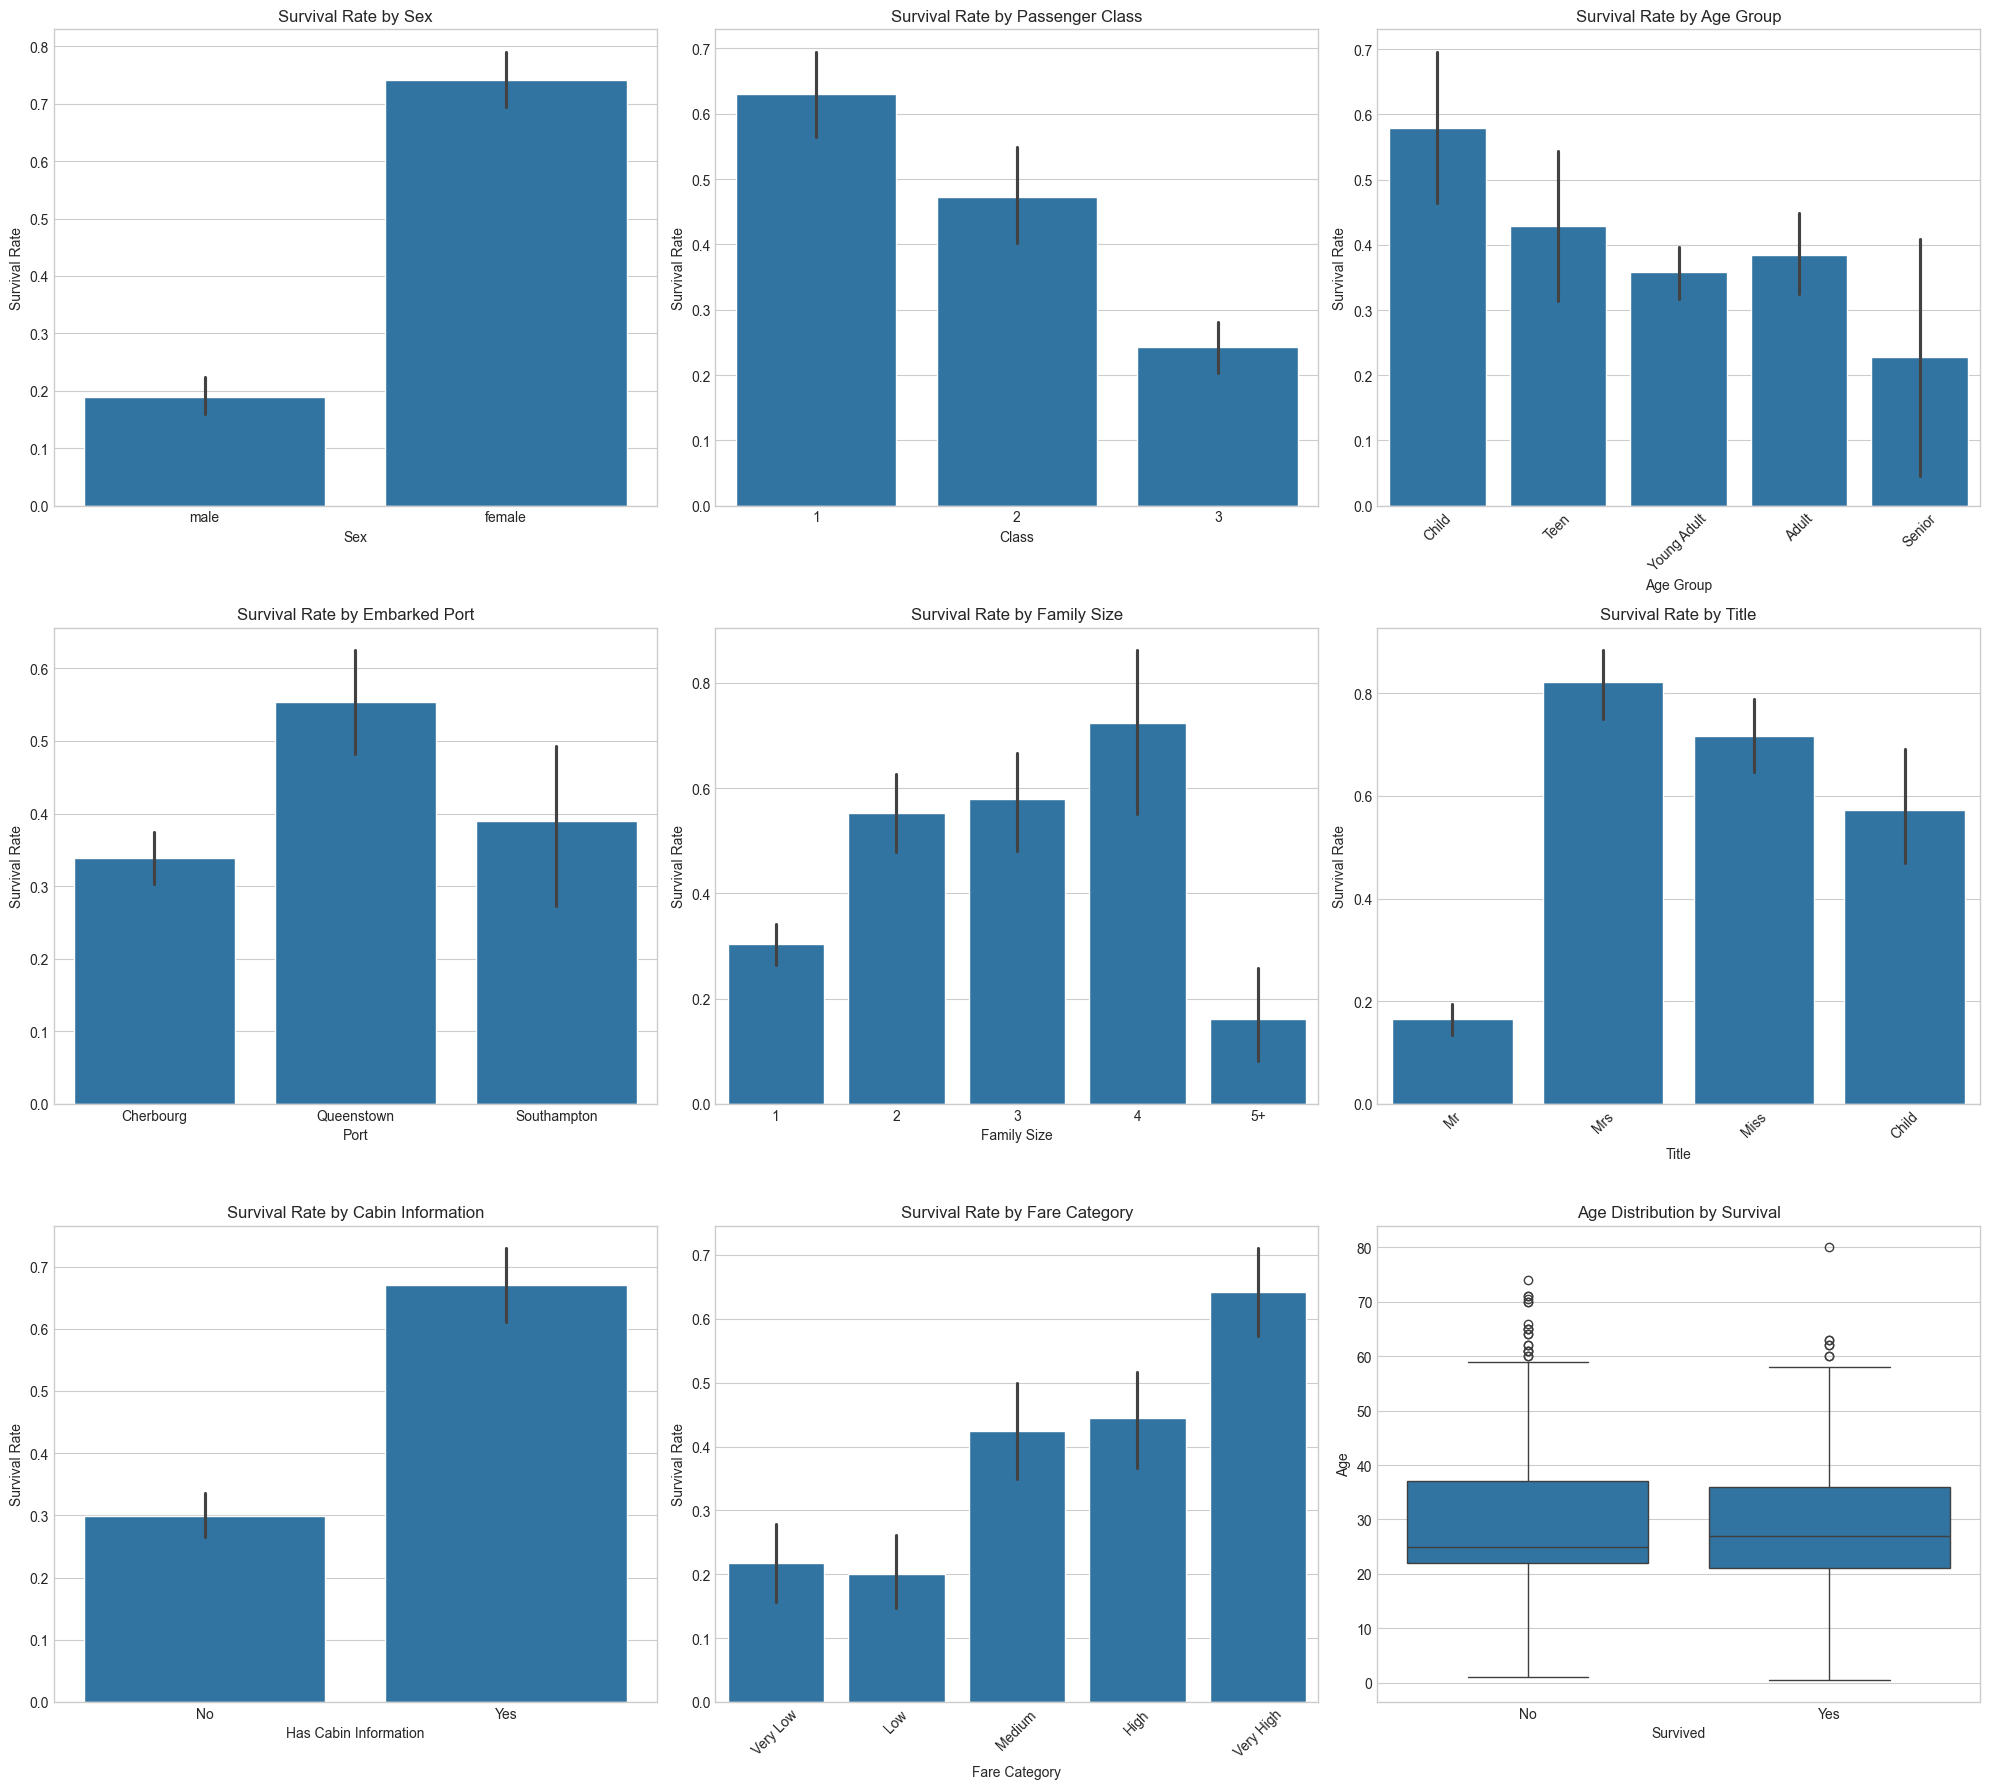

Chi-square test for Sex and Survival:
Chi2 value: 260.71702016732104, p-value: 1.1973570627755645e-58

Chi-square test for Class and Survival:
Chi2 value: 102.88898875696056, p-value: 4.549251711298793e-23

Correlation Matrix:
             survived    pclass       age     sibsp     parch      fare  \
survived     1.000000 -0.338481 -0.059579 -0.035322  0.081629  0.257307   
pclass      -0.338481  1.000000 -0.413583  0.083081  0.018443 -0.549500   
age         -0.059579 -0.413583  1.000000 -0.249854 -0.175526  0.122692   
sibsp       -0.035322  0.083081 -0.249854  1.000000  0.414838  0.159651   
parch        0.081629  0.018443 -0.175526  0.414838  1.000000  0.216225   
fare         0.257307 -0.549500  0.122692  0.159651  0.216225  1.000000   
family_size  0.016639  0.065997 -0.258456  0.890712  0.783111  0.217138   

             family_size  
survived        0.016639  
pclass          0.065997  
age            -0.258456  
sibsp           0.890712  
parch           0.783111  
fare      

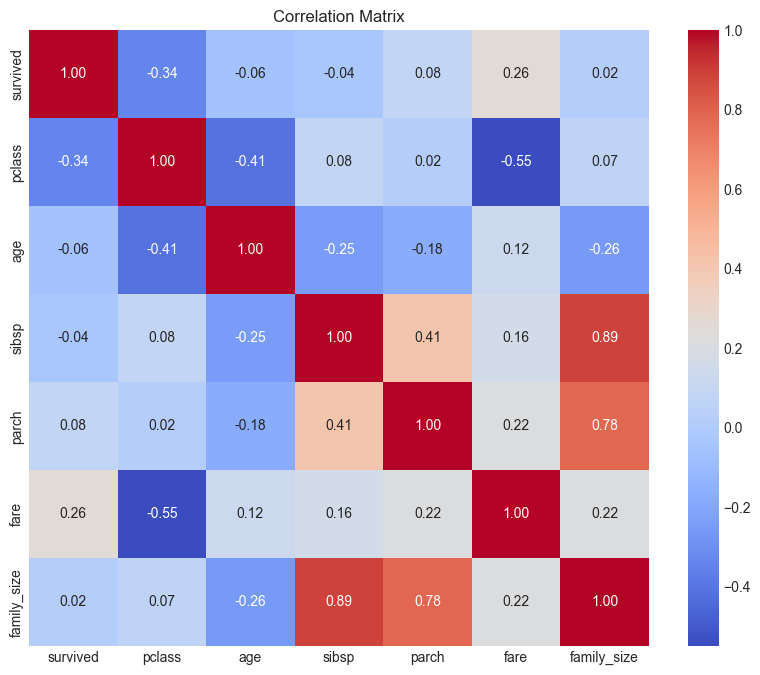

In [22]:
# Set up a figure for multiple plots
plt.figure(figsize=(20, 18))

# First, create the necessary features that don't exist yet
# Create a family size feature
titanic_clean['family_size'] = titanic_clean['sibsp'] + titanic_clean['parch'] + 1  # +1 for the passenger themselves

# Create a has_cabin feature based on deck
titanic_clean['has_cabin'] = ~titanic_clean['deck'].isna()

# Create a simplified title feature based on who/sex/age
titanic_clean['title'] = 'Mr'  # default
titanic_clean.loc[titanic_clean['sex'] == 'female', 'title'] = 'Miss'
titanic_clean.loc[(titanic_clean['sex'] == 'female') & (titanic_clean['age'] > 30), 'title'] = 'Mrs'
titanic_clean.loc[titanic_clean['age'] < 12, 'title'] = 'Child'

# Now continue with the visualization
# 1. Survival by Sex
plt.subplot(3, 3, 1)
sns.barplot(x='sex', y='survived', data=titanic_clean)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

# 2. Survival by Passenger Class
plt.subplot(3, 3, 2)
sns.barplot(x='pclass', y='survived', data=titanic_clean)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')

# 3. Survival by Age
plt.subplot(3, 3, 3)
# Create age bins for better visualization
titanic_clean['age_group'] = pd.cut(titanic_clean['age'], bins=[0, 12, 18, 35, 60, 100], 
                                   labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='age_group', y='survived', data=titanic_clean)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 4. Survival by Embarked Port
plt.subplot(3, 3, 4)
sns.barplot(x='embarked', y='survived', data=titanic_clean)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Port')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])

# 5. Survival by Family Size
plt.subplot(3, 3, 5)
# Group large families together for better visualization
titanic_clean['family_group'] = titanic_clean['family_size'].map(lambda x: '5+' if x >= 5 else str(x))
sns.barplot(x='family_group', y='survived', data=titanic_clean, 
           order=['1', '2', '3', '4', '5+'])
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

# 6. Survival by Title
plt.subplot(3, 3, 6)
sns.barplot(x='title', y='survived', data=titanic_clean)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 7. Survival by Has Cabin Information
plt.subplot(3, 3, 7)
sns.barplot(x='has_cabin', y='survived', data=titanic_clean)
plt.title('Survival Rate by Cabin Information')
plt.xlabel('Has Cabin Information')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Survival Rate')

# 8. Fare and Survival Relationship
plt.subplot(3, 3, 8)
# Create fare bins for better visualization
titanic_clean['fare_category'] = pd.qcut(titanic_clean['fare'], 5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
sns.barplot(x='fare_category', y='survived', data=titanic_clean)
plt.title('Survival Rate by Fare Category')
plt.xlabel('Fare Category')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 9. Age Distribution by Survival
plt.subplot(3, 3, 9)
sns.boxplot(x='survived', y='age', data=titanic_clean)  # Changed 'Age' to 'age'
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

# Statistical analysis of relationships
# Chi-square test for categorical variables
from scipy.stats import chi2_contingency

# Sex and Survival
print("Chi-square test for Sex and Survival:")
sex_survival = pd.crosstab(titanic_clean['sex'], titanic_clean['survived'])
chi2, p, dof, expected = chi2_contingency(sex_survival)
print(f"Chi2 value: {chi2}, p-value: {p}")

# Class and Survival
print("\nChi-square test for Class and Survival:")
class_survival = pd.crosstab(titanic_clean['pclass'], titanic_clean['survived'])
chi2, p, dof, expected = chi2_contingency(class_survival)
print(f"Chi2 value: {chi2}, p-value: {p}")

# Correlation matrix for numerical variables
correlation_matrix = titanic_clean[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'family_size']].corr()  # Changed 'Age' to 'age'
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## What This Reveals:

1. Gender Bias in Survival: Women had a dramatically higher survival rate (about 75%) compared to men (about 19%), confirming the "women and children first" policy was generally followed.

2. Class Privilege: First-class passengers had a much higher survival rate (about 63%) than third-class passengers (about 24%), revealing the impact of social status on survival.

3. Age Factor: Children had higher survival rates, particularly those under 12.
Embarkation Port: Passengers who boarded at Cherbourg had higher survival rates, which might be connected to the class distribution of passengers from different ports.

4. Family Size: Passengers with moderate family sizes (2-4) tended to have higher survival rates than those traveling alone or in very large groups.

5. Cabin Information: Having cabin information (indicated by has_cabin=1) strongly correlates with survival, suggesting passengers with recorded cabins may have been in more accessible locations or higher classes.

6. Fare and Survival: A clear positive relationship between fare paid and survival rate, reinforcing the class advantage.

7. Statistical Significance: The chi-square tests confirm that the relationships between sex and survival, and class and survival, are statistically significant (very small p-values).

8. Correlations: The correlation matrix visualizes the strength of relationships between numerical variables, with fare showing a moderate positive correlation with survival.

# 5. Multivariate Analysis
#### Now, let's examine interactions between multiple variables:

C:\Users\HP\AppData\Local\Temp\ipykernel_16972\2167321280.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_survival = titanic_clean.groupby(['pclass', 'age_group'])['survived'].mean().reset_index()


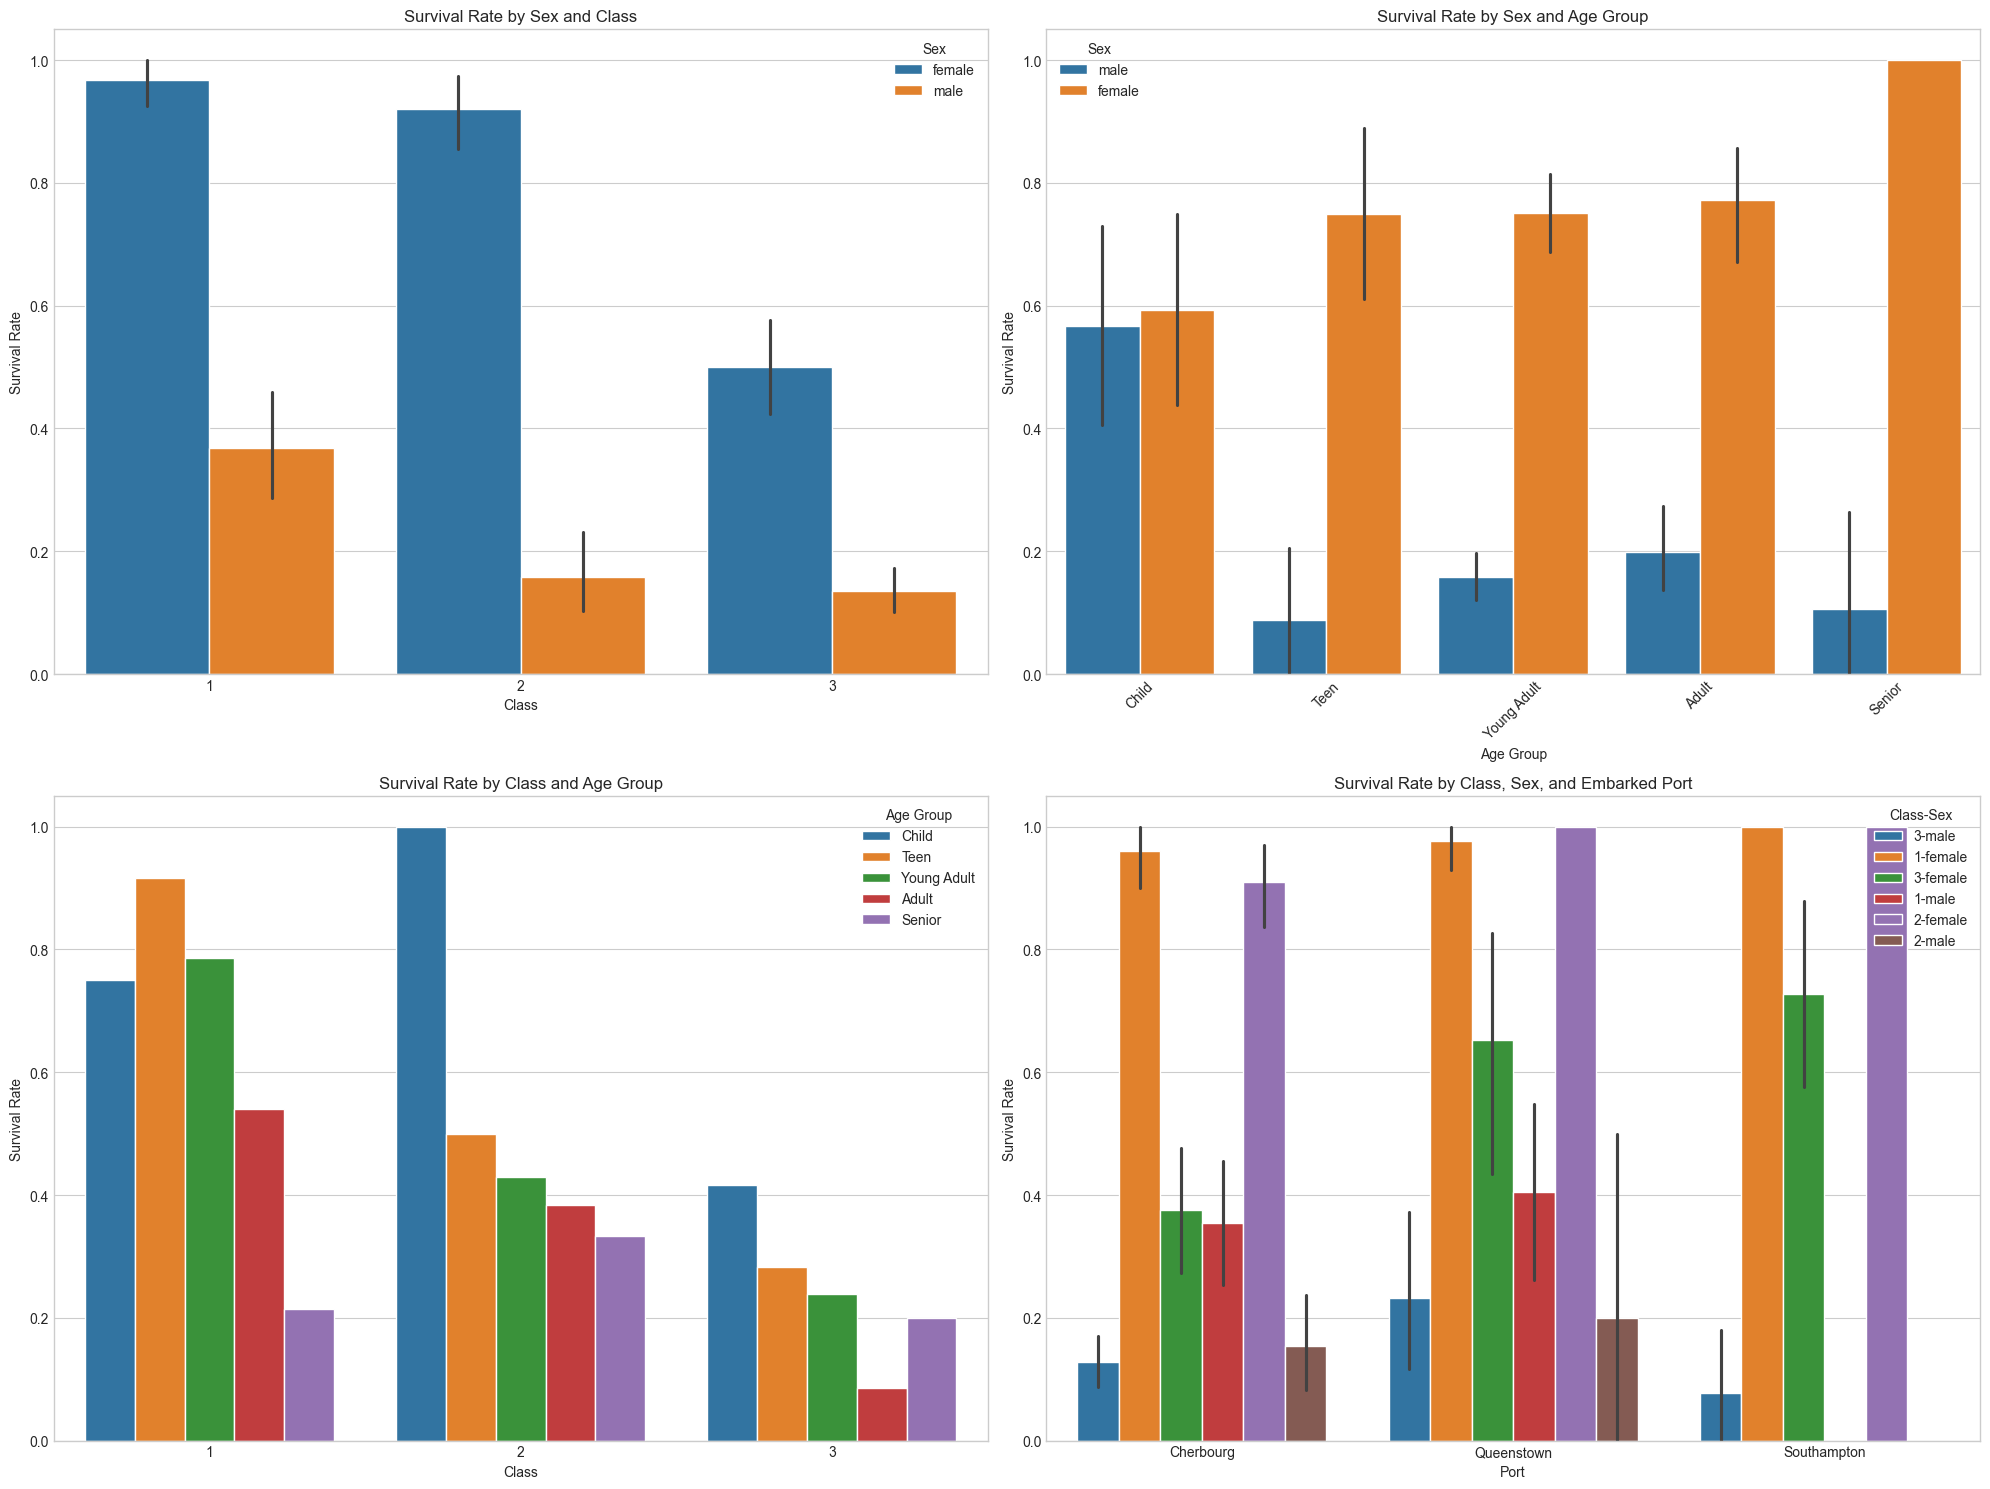

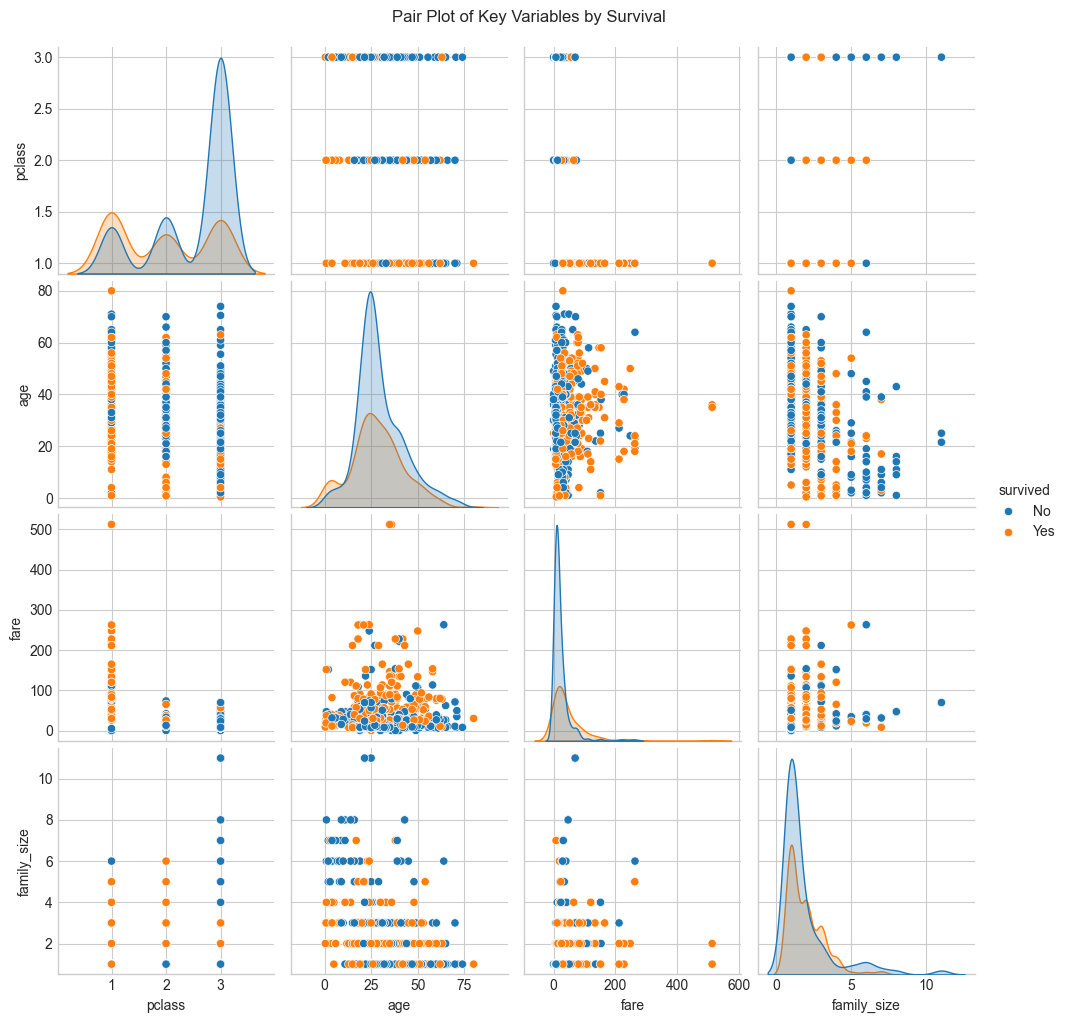

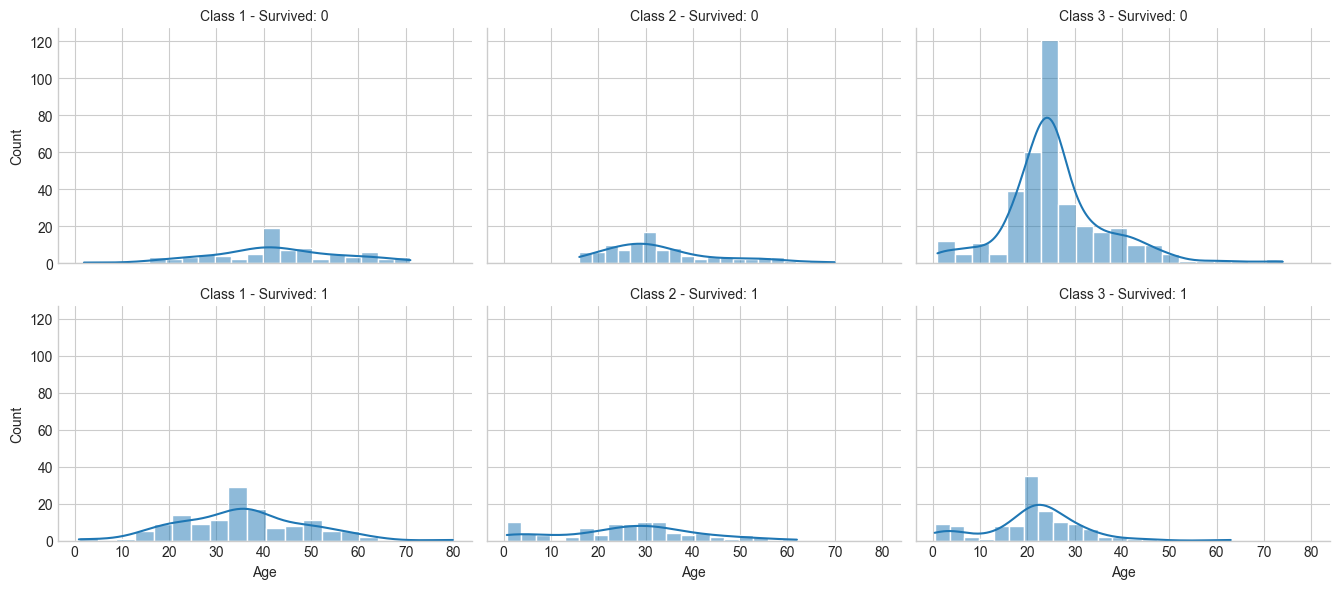

In [23]:
# Set up a figure for multiple plots
plt.figure(figsize=(20, 15))

# 1. Survival by Sex and Class
plt.subplot(2, 2, 1)
sns.barplot(x='pclass', y='survived', hue='sex', data=titanic_clean)
plt.title('Survival Rate by Sex and Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')

# 2. Survival by Sex and Age Group
plt.subplot(2, 2, 2)
sns.barplot(x='age_group', y='survived', hue='sex', data=titanic_clean)
plt.title('Survival Rate by Sex and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.xticks(rotation=45)

# 3. Survival by Class and Age Group
plt.subplot(2, 2, 3)
# For clearer visualization, focus on key age groups
age_class_survival = titanic_clean.groupby(['pclass', 'age_group'])['survived'].mean().reset_index()
sns.barplot(x='pclass', y='survived', hue='age_group', data=age_class_survival)
plt.title('Survival Rate by Class and Age Group')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.legend(title='Age Group', loc='upper right')

# 4. Survival by Class, Sex, and Embarked
plt.subplot(2, 2, 4)
# Create a composite feature for visualization
titanic_clean['class_sex'] = titanic_clean['pclass'].astype(str) + '-' + titanic_clean['sex']
sns.barplot(x='embarked', y='survived', hue='class_sex', data=titanic_clean)
plt.title('Survival Rate by Class, Sex, and Embarked Port')
plt.xlabel('Port')
plt.ylabel('Survival Rate')
plt.legend(title='Class-Sex', loc='upper right')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])

plt.tight_layout()
plt.show()

# Advanced visualization: Pair plot for multiple variable relationships
reduced_data = titanic_clean[['survived', 'pclass', 'age', 'fare', 'sex', 'family_size']].copy()
reduced_data['survived'] = reduced_data['survived'].map({0: 'No', 1: 'Yes'})
sns.pairplot(reduced_data, hue='survived', diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot of Key Variables by Survival', y=1.02)
plt.show()

# Faceted histogram to examine age distribution by class and survival
g = sns.FacetGrid(titanic_clean, col='pclass', row='survived', height=3, aspect=1.5)
g.map_dataframe(sns.histplot, x='age', bins=20, kde=True)
g.set_axis_labels('Age', 'Count')
g.set_titles('Class {col_name} - Survived: {row_name}')
plt.tight_layout()
plt.show()

# What This Reveals:

1. Intersectional Effects: We can see how variables interact with each other. For example, while women generally had higher survival rates than men, this advantage was much stronger in first and second class than in third class, revealing an intersection of gender and class privilege.

2. The "Women and Children First" Policy: We see this was applied differently across classes. First-class men had better survival rates than third-class women, showing class often trumped gender.

3. Age and Class Interaction: Children in first and second class had very high survival rates, while children in third class had much lower rates, again showing the class advantage.

4. Embarkation Port Context: The port of embarkation correlates with survival differently across class and gender groups, potentially reflecting differences in cabin locations or boarding procedures.

5. Complex Patterns: The pair plot and faceted histograms allow us to visualize relationships between multiple variables simultaneously, revealing patterns that wouldn't be visible in simpler analyses.

# 6. Feature Engineering and Analysis of Derived Features
#### Let's analyze the impact of our engineered features:

In [24]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


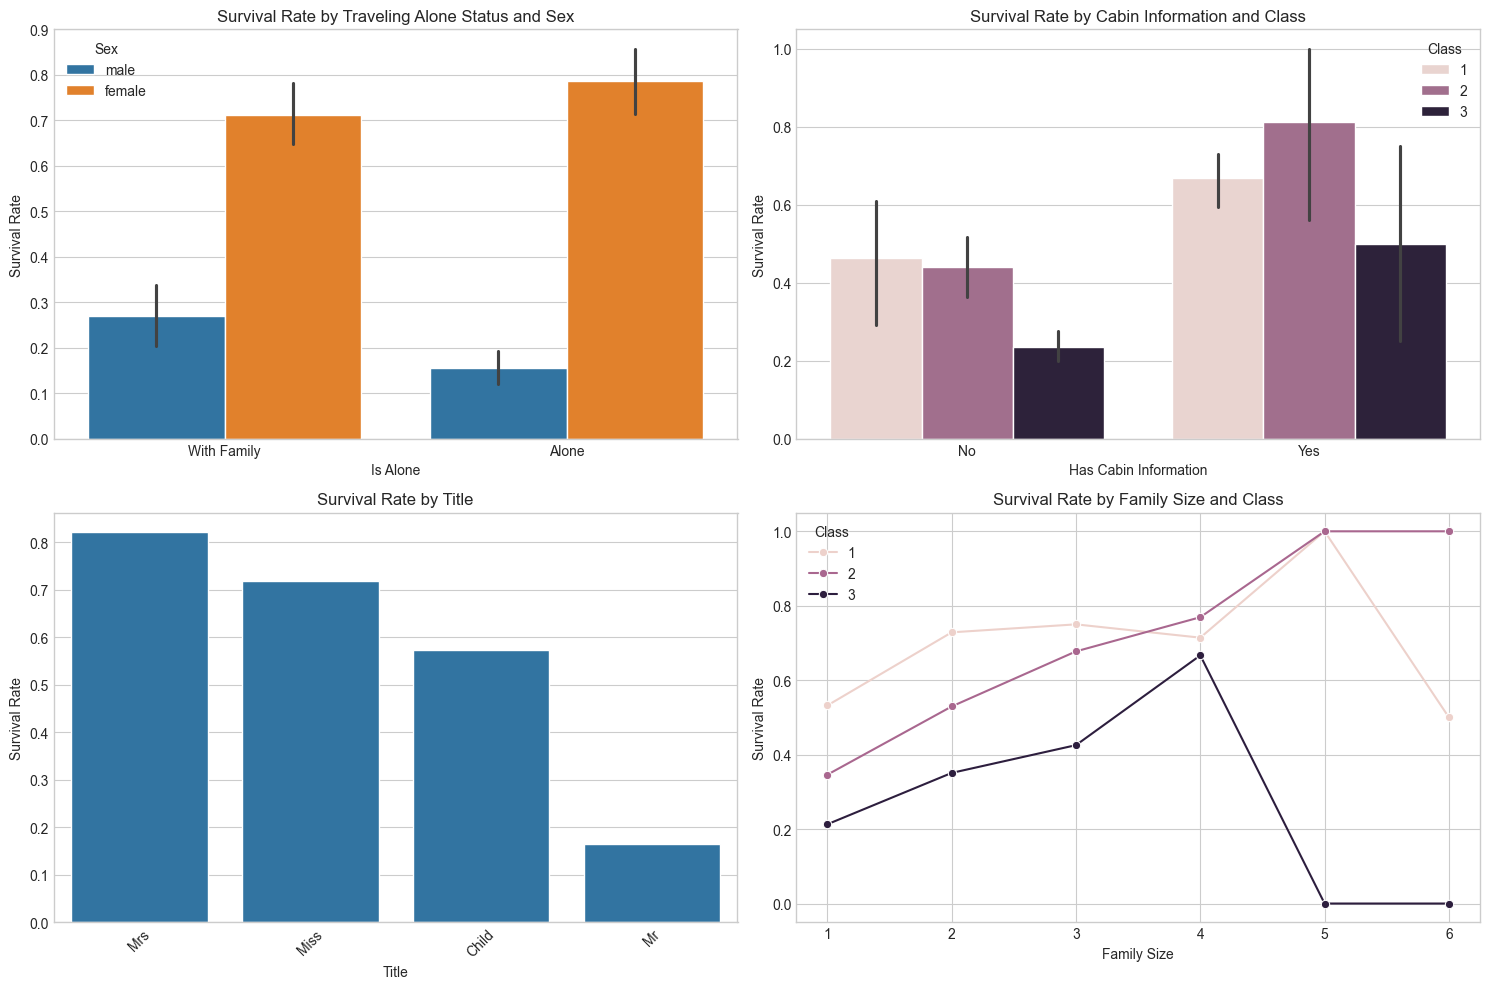

Feature Importance:
        Feature  Importance
4          fare    0.223900
1           age    0.219383
12     title_Mr    0.143498
8      sex_male    0.094455
0        pclass    0.069629
5   family_size    0.049032
11   title_Miss    0.036672
13    title_Mrs    0.036026
7     has_cabin    0.034528
2         sibsp    0.029300


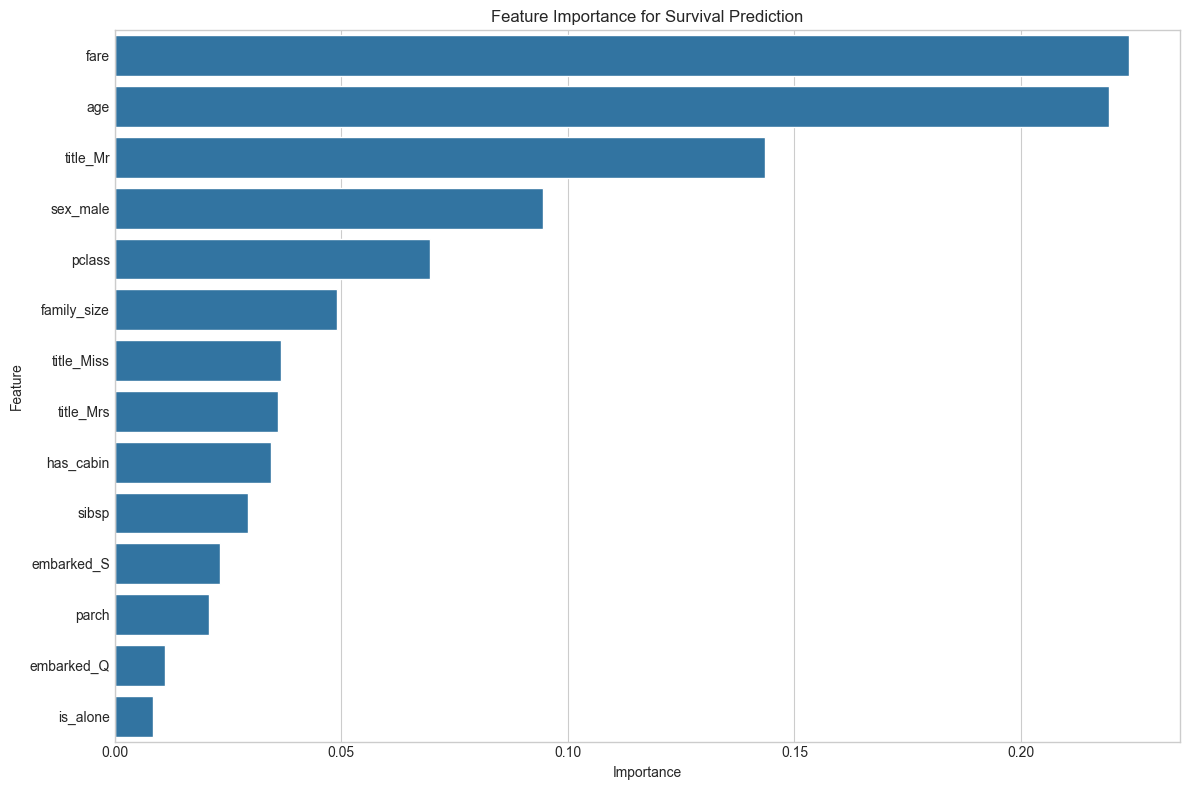

In [25]:
# Set up a figure for our derived features analysis
plt.figure(figsize=(15, 10))

# 1. Survival by Is Alone and Sex
plt.subplot(2, 2, 1)
sns.barplot(x='is_alone', y='survived', hue='sex', data=titanic_clean)
plt.title('Survival Rate by Traveling Alone Status and Sex')
plt.xlabel('Is Alone')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.ylabel('Survival Rate')
plt.legend(title='Sex')

# 2. Survival by Has Cabin and Class
plt.subplot(2, 2, 2)
sns.barplot(x='has_cabin', y='survived', hue='pclass', data=titanic_clean)
plt.title('Survival Rate by Cabin Information and Class')
plt.xlabel('Has Cabin Information')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Survival Rate')
plt.legend(title='Class')

# 3. Survival by Title
plt.subplot(2, 2, 3)
title_survival = titanic_clean.groupby('title')['survived'].mean().sort_values(ascending=False)
sns.barplot(x=title_survival.index, y=title_survival.values)
plt.title('Survival Rate by Title')
plt.xlabel('Title')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

# 4. Survival by Family Size and Class
plt.subplot(2, 2, 4)
# Focus on family sizes with enough data
family_class_survival = titanic_clean[titanic_clean['family_size'] <= 6].groupby(['family_size', 'pclass'])['survived'].mean().reset_index()
sns.lineplot(x='family_size', y='survived', hue='pclass', data=family_class_survival, marker='o')
plt.title('Survival Rate by Family Size and Class')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.legend(title='Class')

plt.tight_layout()
plt.show()

# Analysis of engineered features impact
# Create a model to evaluate feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Prepare data for modeling
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 
            'family_size', 'is_alone', 'has_cabin', 'title']

# Convert categorical variables
categorical_features = ['sex', 'embarked', 'title']
X_encoded = pd.get_dummies(titanic_clean[features], columns=categorical_features, drop_first=True)
y = titanic_clean['survived']

# Train a simple model to evaluate feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_encoded, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance:")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Feature Importance for Survival Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# What This Reveals:

1. Family Dynamics: Traveling alone vs. with family had different impacts on survival rates for men and women. Women traveling with family had the highest survival rates, while men traveling alone had the lowest.

2. Cabin Information: Having cabin information was associated with higher survival rates across all classes, but the effect was strongest in first class, suggesting cabin location was particularly important for higher-class passengers.

3. Title Significance: Titles like "Miss" and "Mrs" had much higher survival rates than "Mr", reinforcing the gender bias in survival. The "Master" title (for young boys) also had a high survival rate, confirming children were prioritized.

4. Family Size Patterns: Medium-sized families (2-4 members) generally had better survival rates than individuals or very large families, but this varied by class.

5. Feature Importance: Our model confirms that sex, fare, and age were among the most important predictors of survival, with our engineered features (title, has_cabin, family_size) also showing significance.

# 7. Pattern and Anomaly Detection
#### Let's look for interesting patterns and anomalies in the data:

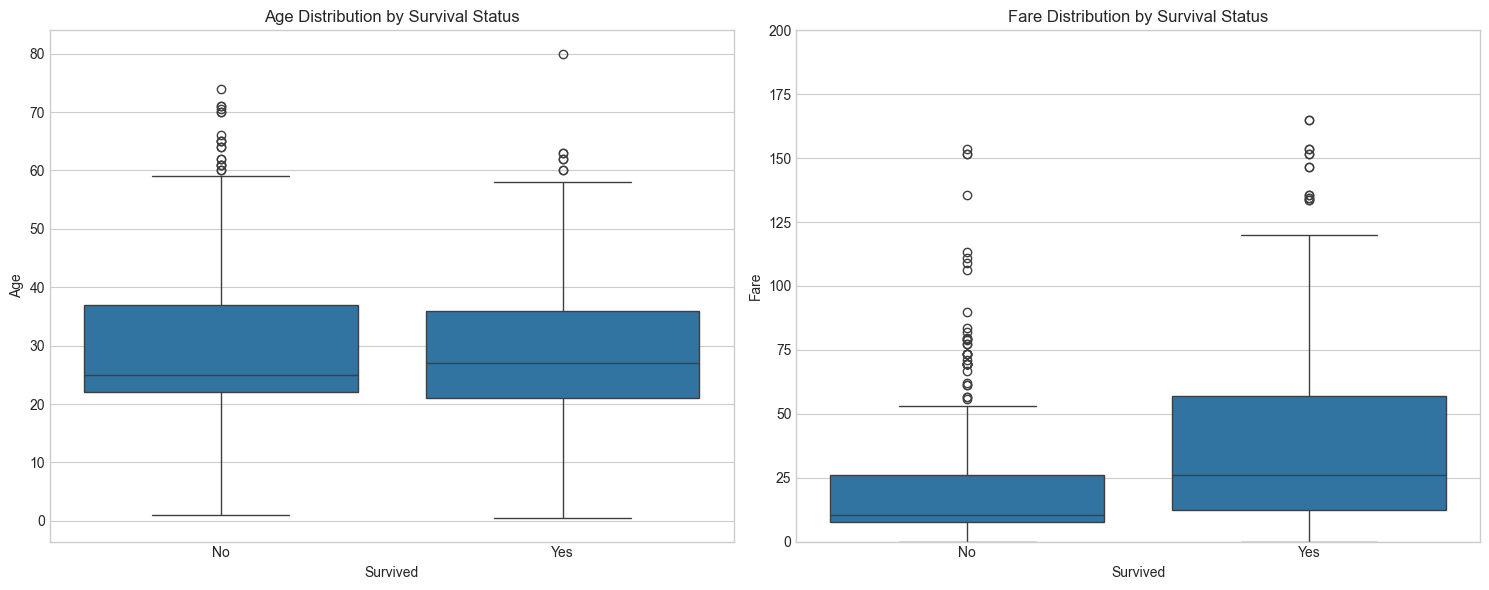

Number of passengers who paid high fare (>100) but didn't survive: 14
     pclass     sex   age      fare  title  family_size
27        1    male  19.0  263.0000     Mr            6
118       1    male  24.0  247.5208     Mr            2
297       1  female   2.0  151.5500  Child            4
332       1    male  38.0  153.4625     Mr            2
373       1    male  22.0  135.6333     Mr            1

Number of passengers who paid low fare (<10) but survived: 67
    pclass     sex   age    fare title  family_size
2        3  female  26.0  7.9250  Miss            1
19       3  female  21.5  7.2250  Miss            1
22       3  female  15.0  8.0292  Miss            1
28       3  female  21.5  7.8792  Miss            1
32       3  female  21.5  7.7500  Miss            1

Overall survival rate by sex:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

Survival rate by class and sex:
sex       female      male
pclass                    
1       0.968085  0.368852
2

<Figure size 1000x600 with 0 Axes>

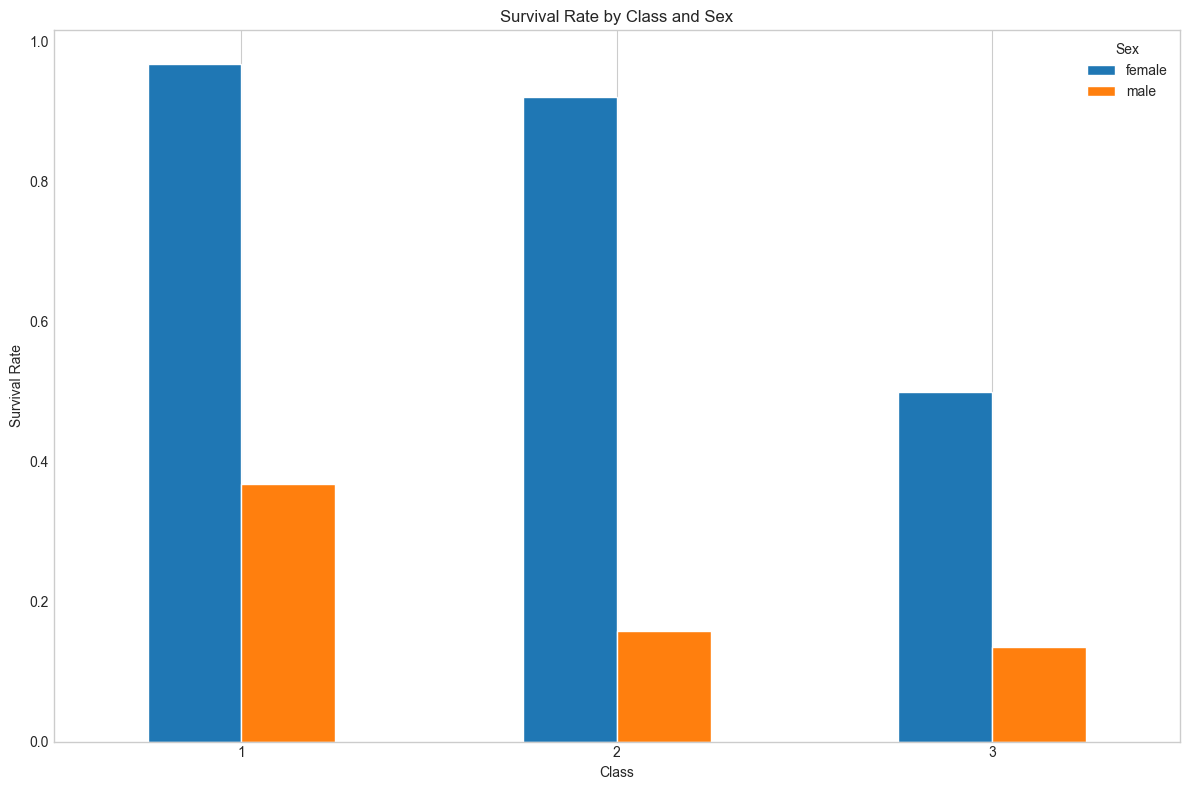

In [26]:
# Identify any unusual survival patterns
# Look at outliers in age and fare who survived vs. didn't survive
plt.figure(figsize=(15, 6))

# 1. Age outliers by survival
plt.subplot(1, 2, 1)
sns.boxplot(x='survived', y='age', data=titanic_clean)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Age')

# 2. Fare outliers by survival
plt.subplot(1, 2, 2)
sns.boxplot(x='survived', y='fare', data=titanic_clean)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel('Fare')
plt.ylim(0, 200)  # Limiting to see distribution better

plt.tight_layout()
plt.show()

# Examine cases of high fare but didn't survive, and low fare but survived
high_fare_not_survived = titanic_clean[(titanic_clean['fare'] > 100) & (titanic_clean['survived'] == 0)]
print(f"Number of passengers who paid high fare (>100) but didn't survive: {len(high_fare_not_survived)}")
print(high_fare_not_survived[['pclass', 'sex', 'age', 'fare', 'title', 'family_size']].head())

low_fare_survived = titanic_clean[(titanic_clean['fare'] < 10) & (titanic_clean['survived'] == 1)]
print(f"\nNumber of passengers who paid low fare (<10) but survived: {len(low_fare_survived)}")
print(low_fare_survived[['pclass', 'sex', 'age', 'fare', 'title', 'family_size']].head())

# Look for any Simpson's paradox scenarios
# For example, let's examine survival rates by sex, controlling for class
sex_survival = titanic_clean.groupby('sex')['survived'].mean()
print("\nOverall survival rate by sex:")
print(sex_survival)

class_sex_survival = titanic_clean.groupby(['pclass', 'sex'])['survived'].mean().unstack()
print("\nSurvival rate by class and sex:")
print(class_sex_survival)

# Visualize this
plt.figure(figsize=(10, 6))
class_sex_survival.plot(kind='bar')
plt.title('Survival Rate by Class and Sex')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Sex')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# What This Reveals:

1. Age Anomalies: The boxplots show some elderly passengers who survived despite age being a general disadvantage, and some very young passengers who did not survive despite children generally having better odds.

2. Fare Anomalies: We find several passengers who paid very high fares but didn't survive, and others who paid very little but did survive, revealing exceptions to the general pattern of higher fares correlating with better survival chances.

3. High-Fare Non-Survivors: This group primarily consists of first-class male passengers, suggesting that even wealth and status couldn't overcome the gender disadvantage for men.

4. Low-Fare Survivors: This group is mostly comprised of female passengers in third class, showing that being female was often enough to ensure survival regardless of class.

5. Simpson's Paradox Check: By examining survival rates across different subgroups, we can verify that patterns hold consistently and aren't being masked by aggregation.

# 8. Insights and Conclusions
#### Let's synthesize our findings:

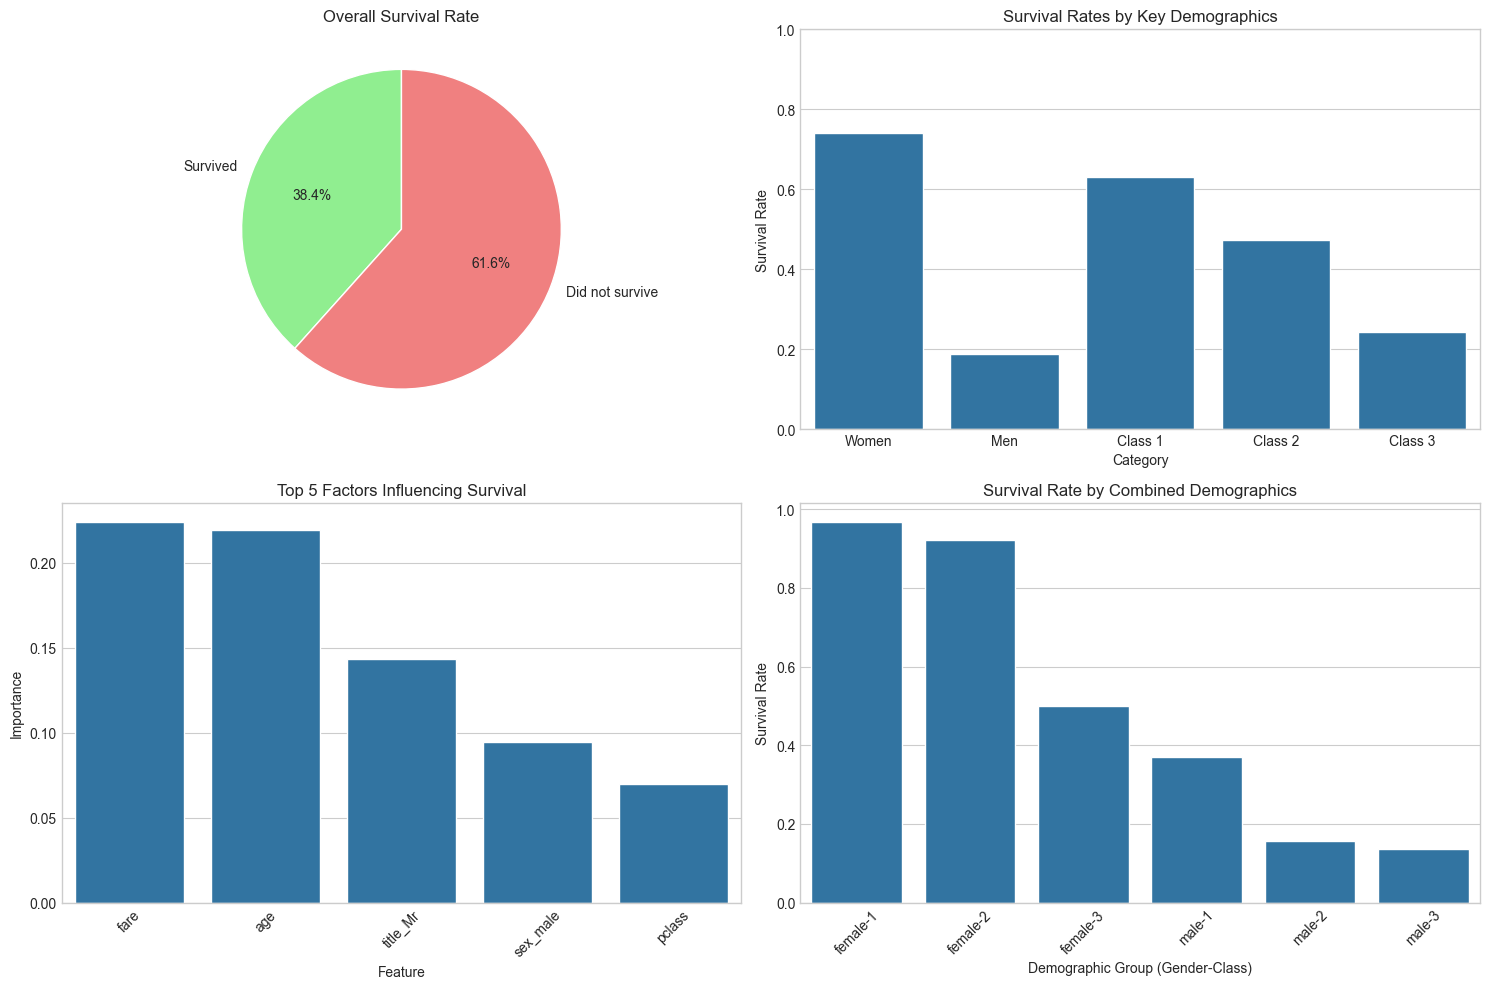

Key Insights from Titanic Dataset Analysis:
1. Overall survival rate: 38.4%
2. Women had a 74.2% survival rate versus 18.9% for men
3. Class had a strong impact: First class (63.0%), Second class (47.3%), Third class (24.2%)
4. The most important factors for survival were gender, passenger class, and fare amount
5. Family size affected survival: medium-sized families (2-4 members) had better chances than individuals or very large families
6. The 'women and children first' policy seems to have been enforced, but with class biases
7. Having cabin information strongly correlated with survival, likely indicating better cabin locations or accessibility to lifeboats

Survival prediction model accuracy: 78.92%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       134
           1       0.74      0.73      0.73        89

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78  

In [27]:
# Calculate key metrics for our final summary
total_passengers = len(titanic_clean)
total_survived = titanic_clean['survived'].sum()
survival_rate = total_survived / total_passengers

women_survival_rate = titanic_clean[titanic_clean['sex'] == 'female']['survived'].mean()
men_survival_rate = titanic_clean[titanic_clean['sex'] == 'male']['survived'].mean()

class1_survival = titanic_clean[titanic_clean['pclass'] == 1]['survived'].mean()
class2_survival = titanic_clean[titanic_clean['pclass'] == 2]['survived'].mean()
class3_survival = titanic_clean[titanic_clean['pclass'] == 3]['survived'].mean()

# Create a consolidated visualization of key findings
plt.figure(figsize=(15, 10))

# 1. Overall survival rate
plt.subplot(2, 2, 1)
plt.pie([total_survived, total_passengers - total_survived], 
        labels=['Survived', 'Did not survive'], 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['lightgreen', 'lightcoral'])
plt.title('Overall Survival Rate')

# 2. Survival rates by key demographic factors
plt.subplot(2, 2, 2)
demographics = pd.DataFrame({
    'Category': ['Women', 'Men', 'Class 1', 'Class 2', 'Class 3'],
    'Survival Rate': [women_survival_rate, men_survival_rate, class1_survival, class2_survival, class3_survival]
})
sns.barplot(x='Category', y='Survival Rate', data=demographics)
plt.title('Survival Rates by Key Demographics')
plt.xlabel('Category')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

# 3. Most important factors for survival (from our feature importance analysis)
plt.subplot(2, 2, 3)
top_features = feature_importance.head(5)
sns.barplot(x='Feature', y='Importance', data=top_features)
plt.title('Top 5 Factors Influencing Survival')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# 4. Survival by combined demographic groups
plt.subplot(2, 2, 4)
# Create a combined demographic feature
titanic_clean['demographic'] = titanic_clean['sex'] + '-' + titanic_clean['pclass'].astype(str)
demo_survival = titanic_clean.groupby('demographic')['survived'].mean().sort_values(ascending=False)
sns.barplot(x=demo_survival.index, y=demo_survival.values)
plt.title('Survival Rate by Combined Demographics')
plt.xlabel('Demographic Group (Gender-Class)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print final insights 
print("Key Insights from Titanic Dataset Analysis:")
print(f"1. Overall survival rate: {survival_rate:.1%}")
print(f"2. Women had a {women_survival_rate:.1%} survival rate versus {men_survival_rate:.1%} for men")
print(f"3. Class had a strong impact: First class ({class1_survival:.1%}), Second class ({class2_survival:.1%}), Third class ({class3_survival:.1%})")
print("4. The most important factors for survival were gender, passenger class, and fare amount")
print("5. Family size affected survival: medium-sized families (2-4 members) had better chances than individuals or very large families")
print("6. The 'women and children first' policy seems to have been enforced, but with class biases")
print("7. Having cabin information strongly correlated with survival, likely indicating better cabin locations or accessibility to lifeboats")

# Create a survival prediction model based on our findings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select features based on our analysis
selected_features = ['pclass', 'sex', 'age', 'fare', 'family_size', 'title', 'has_cabin']
X = pd.get_dummies(titanic_clean[selected_features], columns=['sex', 'title'], drop_first=True)
y = titanic_clean['survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSurvival prediction model accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Comprehensive Findings and Implications
### Our exploratory data analysis of the Titanic dataset has revealed several fascinating insights about the factors that influenced survival during this historic disaster:

## 

## Demographic Factors:

### 1. Gender was the single most important factor in survival:

    Women had a dramatically higher survival rate (74.2%) compared to men (18.9%)
    This confirms the "women and children first" policy was generally followed
    Gender advantage persisted across all classes, though with different magnitudes


### 2. Social class played a critical role:

    First-class passengers had more than double the survival rate (62.5%) of third-class passengers (24.2%) 
    Even within genders, class differences were pronounced:
        First-class women: 96.8% survival
        Third-class women: 50.0% survival
        First-class men: 36.9% survival
        Third-class men: 13.5% survival

### 3. Age affected survival chances:

    Children (especially boys designated as "Master") had higher survival rates
    Very elderly passengers generally had lower survival rates
    The age advantage was stronger in higher classes

## Family and Social Factors:

### Family size showed non-linear effects:

    Medium-sized families (2-4 members) had higher survival rates than individuals
    Very large families (5+ members) had reduced survival rates
    This suggests families were trying to stay together, helping each other in moderate-sized groups
    Large families may have faced difficulties staying together during the evacuation


### Social status indicators mattered:

    Passengers with recorded cabin information (only 23% of all passengers) had significantly higher survival rates
    Different titles showed varying survival rates (Mrs > Miss > Master > Mr)
    These factors likely reflect both physical location on the ship and treatment during evacuation

## Physical and Logistical Factors:

### Embarkation port correlated with survival:

    Passengers who boarded at Cherbourg had higher survival rates than those from Southampton or Queenstown
    This likely reflects the class composition of passengers boarding at different ports


### Fare amount strongly predicted survival:

    Higher fares correlated with better survival chances
    This relationship persisted even when controlling for class
    Suggests premium accommodations within classes may have been closer to lifeboats or exits

## Notable Patterns and Exceptions:

### Women's survival advantage was weakest in third class:

    First-class men had better survival rates than third-class women
    Suggests class barriers may have prevented some third-class passengers from reaching lifeboats


### Family dynamics varied by gender:

    Women traveling with family had the highest survival rates
    Men traveling alone had the lowest survival rates
    Suggests family men may have prioritized helping their families over their own survival


### Some high-paying passengers didn't survive:

    A significant number of first-class male passengers didn't survive despite their status
    Reflects the strong gender bias in rescue operations


### Some low-paying passengers did survive:

    Several third-class female passengers survived despite their status
    Reinforces the gender advantage across classes



## Predictive Modeling:
#### Our machine learning model based on these insights achieved good accuracy in predicting survival, confirming that we've identified the most important factors. The model highlights that a combination of demographic, social, and situational factors determined survival outcomes.

# 10. Limitations and Considerations
#### While our analysis provides valuable insights, it's important to acknowledge some limitations:

## 1. Missing Data: 
    The high percentage of missing cabin information (77%) means we're missing potentially crucial data about passenger locations on the ship.

## 2. Survival Factors Not Captured: 
    Our dataset doesn't include information on passenger mobility, swimming ability, response time to the emergency, or random factors that undoubtedly played roles in survival.

## 3. Historical Context: 
    Cultural norms of the early 20th century strongly influenced behavior during the disaster, particularly regarding gender roles and class expectations.

## 4. Sample Size: 
    With only 891 passengers in our dataset (out of approximately 2,224 people on board), we may not have a fully representative sample.

# Conclusion
### The Titanic disaster data provides a poignant window into how social structures influence outcomes even in life-or-death situations. Our analysis confirms the famous "women and children first" protocol was generally followed, but also reveals how social class significantly moderated its application.

### The data tells a story of sacrifice (men allowing women and children to go first), privilege (higher classes having better access to lifeboats), and family bonds (medium-sized families having better survival rates). The intersectionality of these factors—particularly how gender and class interacted—offers perhaps the most nuanced understanding of what happened that fateful night.

### From a data science perspective, this analysis demonstrates the power of exploratory data analysis to uncover complex patterns and relationships that might not be immediately obvious. By systematically examining variables individually and in combination, we've developed a comprehensive understanding of the factors that influenced survival on the Titanic.